# Projeto de Classificação Multiclasse - Tipos de Glaucoma 
Objetivo: Classificar o tipo de glaucoma a partir de dados tabulares. O dataset utilizado foi obtido no [Kaggle](https://www.kaggle.com/datasets/teamincribo/glaucoma-detection-dataset).
  
**Alunos: Arthur Cisotto, Marlon Pereira**

## Visão Geral do Dataset

O dataset "Glaucoma Detection" que estamos utilizando neste projeto é muito útil para o desenvolvimento de modelos de machine learning robustos voltados para a detecção do Glaucoma. Este dataset abrangente é composto por 10.000 registros, cada um contendo 17 campos, que são cruciais para a análise e diagnóstico dessa condição oftalmológica.

## Campos do Dataset

Os campos disponíveis no dataset incluem:

1. **Patient ID**: Identificação única de cada paciente.
2. **Age**: Idade do paciente.
3. **Gender**: Gênero do paciente.
4. **Visual Acuity Measurements**: Medidas de acuidade visual.
5. **Intraocular Pressure (IOP)**: Pressão intraocular.
6. **Cup-to-Disc Ratio (CDR)**: Relação copa-disco.
7. **Family History**: Histórico familiar de condições oculares.
8. **Medical History**: Histórico médico geral do paciente.
9. **Medication Usage**: Uso de medicamentos.
10. **Visual Field Test Results**: Resultados do teste de campo visual.
11. **Optical Coherence Tomography (OCT) Results**: Resultados da Tomografia de Coerência Óptica.
12. **Pachymetry**: Medição da espessura da córnea.
13. **Cataract Status**: Status de catarata.
14. **Angle Closure Status**: Status de fechamento angular.
15. **Visual Symptoms**: Sintomas visuais reportados.
16. **Diagnosis**: Diagnóstico clínico.
17. **Glaucoma Type**: Tipo de Glaucoma.

## Target Feature: Glaucoma Type

O foco principal deste projeto é a feature 'Glaucoma Type', que é a variável alvo (target) do nosso modelo de machine learning. Esta feature categoriza os registros em diferentes tipos de Glaucoma, que são:

- Juvenile Glaucoma
- Normal-Tension Glaucoma
- Primary Open-Angle Glaucoma
- Secondary Glaucoma
- Congenital Glaucoma
- Angle-Closure Glaucoma

A análise detalhada e a previsão precisa desta feature são vitais para o diagnóstico e tratamento eficazes do Glaucoma. O nosso objetivo é construir um modelo que possa identificar com precisão estes diferentes tipos de Glaucoma com base nos dados disponíveis.

### 1. Leitura dos dados e importação das bibliotecas

In [139]:
import pathlib
import pickle
import requests
import zipfile
import io
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [140]:
DATA_DIR = pathlib.Path.cwd().parent / 'data'
print(DATA_DIR)

c:\Users\Marlon\Desktop\6_Semestre\ML\Projeto2_MachineLearning_23.2\data


In [141]:
DATA_DIR.mkdir(parents=True, exist_ok=True)

In [142]:
raw_data_dir = DATA_DIR / 'raw'
raw_data_dir.mkdir(parents=True, exist_ok=True)
print(raw_data_dir)

c:\Users\Marlon\Desktop\6_Semestre\ML\Projeto2_MachineLearning_23.2\data\raw


In [143]:
raw_data_file_path = DATA_DIR / 'raw' / 'glaucoma_dataset.csv'
print(raw_data_file_path)

c:\Users\Marlon\Desktop\6_Semestre\ML\Projeto2_MachineLearning_23.2\data\raw\glaucoma_dataset.csv


In [144]:
filesize = raw_data_file_path.stat().st_size
print(f'This file has {filesize} bytes')

This file has 3380533 bytes


In [145]:
raw_data = pd.read_csv(raw_data_file_path)

In [146]:
raw_data.shape

(10000, 17)

Primeira visualização dos dados.

In [147]:
raw_data.head()

,Patient ID,Age,Gender,Visual Acuity Measurements,Intraocular Pressure (IOP),Cup-to-Disc Ratio (CDR),Family History,Medical History,Medication Usage,Visual Field Test Results,Optical Coherence Tomography (OCT) Results,Pachymetry,Cataract Status,Angle Closure Status,Visual Symptoms,Diagnosis,Glaucoma Type
0,62431,69,Male,LogMAR 0.1,19.46,0.42,No,Diabetes,"Amoxicillin, Lisinopril, Omeprazole, Atorvasta...","Sensitivity: 0.54, Specificity: 0.75","RNFL Thickness: 86.48 µm, GCC Thickness: 64.14...",541.51,Present,Open,"Tunnel vision, Eye pain, Nausea",No Glaucoma,Primary Open-Angle Glaucoma
1,68125,69,Female,LogMAR 0.1,18.39,0.72,No,Hypertension,"Lisinopril, Amoxicillin, Atorvastatin, Ibuprof...","Sensitivity: 0.72, Specificity: 0.88","RNFL Thickness: 96.88 µm, GCC Thickness: 56.48...",552.77,Absent,Open,"Redness in the eye, Vision loss, Tunnel vision",No Glaucoma,Juvenile Glaucoma
2,63329,67,Female,20/40,23.65,0.72,No,Hypertension,"Amoxicillin, Ibuprofen, Metformin, Atorvastati...","Sensitivity: 0.56, Specificity: 0.8","RNFL Thickness: 89.81 µm, GCC Thickness: 59.05...",573.65,Absent,Closed,"Halos around lights, Vision loss, Redness in t...",No Glaucoma,Juvenile Glaucoma
3,47174,23,Male,LogMAR 0.0,18.04,0.61,No,NaN,"Ibuprofen, Aspirin","Sensitivity: 0.6, Specificity: 0.93","RNFL Thickness: 87.25 µm, GCC Thickness: 63.98...",590.67,Absent,Closed,"Nausea, Nausea, Halos around lights",No Glaucoma,Congenital Glaucoma
4,67361,21,Male,LogMAR 0.1,15.87,0.30,No,Diabetes,"Amoxicillin, Omeprazole, Aspirin, Ibuprofen, A...","Sensitivity: 0.82, Specificity: 0.9","RNFL Thickness: 82.61 µm, GCC Thickness: 66.01...",588.41,Absent,Closed,"Eye pain, Eye pain, Tunnel vision",No Glaucoma,Primary Open-Angle Glaucoma


Vamos fazer uma cópia do dataset original para não alterar os dados originais.

In [148]:
data = raw_data.copy()

In [149]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Patient ID                                  10000 non-null  int64  
 1   Age                                         10000 non-null  int64  
 2   Gender                                      10000 non-null  object 
 3   Visual Acuity Measurements                  10000 non-null  object 
 4   Intraocular Pressure (IOP)                  10000 non-null  float64
 5   Cup-to-Disc Ratio (CDR)                     10000 non-null  float64
 6   Family History                              10000 non-null  object 
 7   Medical History                             7453 non-null   object 
 8   Medication Usage                            8769 non-null   object 
 9   Visual Field Test Results                   10000 non-null  object 
 10  Optical Coh

In [150]:
data.dtypes.value_counts()

object     12
float64     3
int64       2
Name: count, dtype: int64

### 2. Preparação dos dados

#### Preenchendo valores faltantes

Existem apenas 2 colunas com valores faltantes, sendo elas: 'Medication Usage' e 'Medical History'. Como são colunas categóricas, vamos preencher os valores faltantes com 'None'.

In [151]:
data['Medication Usage'].fillna('None', inplace=True)
data['Medical History'].fillna('None', inplace=True)

In [152]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Patient ID                                  10000 non-null  int64  
 1   Age                                         10000 non-null  int64  
 2   Gender                                      10000 non-null  object 
 3   Visual Acuity Measurements                  10000 non-null  object 
 4   Intraocular Pressure (IOP)                  10000 non-null  float64
 5   Cup-to-Disc Ratio (CDR)                     10000 non-null  float64
 6   Family History                              10000 non-null  object 
 7   Medical History                             10000 non-null  object 
 8   Medication Usage                            10000 non-null  object 
 9   Visual Field Test Results                   10000 non-null  object 
 10  Optical Coh

Como podemos ver, agora não existem mais valores faltantes no dataset.

#### Features que possuem múltiplos valores (categorias) separados por vírgula

Como podemos ver, algumas features possuem múltiplos valores separados por vírgula. Vamos analisar cada uma delas e verificar quantos valores únicos existem em cada feature.

#### Medication Usage

In [153]:
medications = set()
for item in data['Medication Usage']:
    try:
        medications.update(item.split(', '))
    except AttributeError:
        pass


In [154]:
medications

{'Amoxicillin',
 'Aspirin',
 'Atorvastatin',
 'Ibuprofen',
 'Lisinopril',
 'Metformin',
 'None',
 'Omeprazole'}

#### Medical History

In [155]:
medical_history = set()
for item in data['Medical History']:
    try:
        medical_history.update(item.split(', '))
    except AttributeError:
        pass

In [156]:
medical_history

{'Diabetes', 'Glaucoma in family', 'Hypertension', 'None'}

#### Visual Symptoms

In [157]:
visual_symptoms = set()
for item in data['Visual Symptoms']:
    try:
        visual_symptoms.update(item.split(', '))
    except AttributeError:
        pass

In [158]:
visual_symptoms

{'Blurred vision',
 'Eye pain',
 'Halos around lights',
 'Nausea',
 'Redness in the eye',
 'Tunnel vision',
 'Vision loss',
 'Vomiting'}

#### Transformando as features de múltiplos valores em múltiplas features binárias


Como podemos ver, as 3 features que possuem múltiplos valores separados por vírgula possuem poucos valores únicos. Portanto, vamos transformar cada valor único em uma nova feature binária.

In [159]:
for item in medications:
    if item == 'None':
        data['No Medication'] = data['Medication Usage'].str.contains(item).astype('category')
    else:
        data[item] = data['Medication Usage'].str.contains(item).astype('category')

data = data.drop('Medication Usage', axis=1)

In [160]:
for item in medical_history:
    if item == 'None':
        data['No Medical History'] = data['Medical History'].str.contains(item).astype('category')
    else:
        data[item] = data['Medical History'].str.contains(item).astype('category')

data = data.drop('Medical History', axis=1)

In [161]:
for item in visual_symptoms:
    data[item] = data['Visual Symptoms'].str.contains(item).astype('category')

data = data.drop('Visual Symptoms', axis=1)

In [162]:
data.head()

,Patient ID,Age,Gender,Visual Acuity Measurements,Intraocular Pressure (IOP),Cup-to-Disc Ratio (CDR),Family History,Visual Field Test Results,Optical Coherence Tomography (OCT) Results,Pachymetry,...,Diabetes,Glaucoma in family,Nausea,Blurred vision,Vomiting,Redness in the eye,Halos around lights,Eye pain,Tunnel vision,Vision loss
0,62431,69,Male,LogMAR 0.1,19.46,0.42,No,"Sensitivity: 0.54, Specificity: 0.75","RNFL Thickness: 86.48 µm, GCC Thickness: 64.14...",541.51,...,True,False,True,False,False,False,False,True,True,False
1,68125,69,Female,LogMAR 0.1,18.39,0.72,No,"Sensitivity: 0.72, Specificity: 0.88","RNFL Thickness: 96.88 µm, GCC Thickness: 56.48...",552.77,...,False,False,False,False,False,True,False,False,True,True
2,63329,67,Female,20/40,23.65,0.72,No,"Sensitivity: 0.56, Specificity: 0.8","RNFL Thickness: 89.81 µm, GCC Thickness: 59.05...",573.65,...,False,False,False,False,False,True,True,False,False,True
3,47174,23,Male,LogMAR 0.0,18.04,0.61,No,"Sensitivity: 0.6, Specificity: 0.93","RNFL Thickness: 87.25 µm, GCC Thickness: 63.98...",590.67,...,False,False,True,False,False,False,True,False,False,False
4,67361,21,Male,LogMAR 0.1,15.87,0.30,No,"Sensitivity: 0.82, Specificity: 0.9","RNFL Thickness: 82.61 µm, GCC Thickness: 66.01...",588.41,...,True,False,False,False,False,False,False,True,True,False


#### Features que possuem múltiplos valores numéricos separados por vírgula.

Como podemos ver, algumas features possuem múltiplos valores numéricos separados por vírgula. Neste caso, essas features representam os resultados de exames oftalmológicos. Logo, essas features são, na verdade, várias features unidas em uma só. Portanto, vamos separar cada valor numérico em uma nova feature.

Separando a coluna "Visual Field Test Results" em "VFTR Sensitivity" e "VFTR Specificity"

In [163]:
data[['VFTR Sensitivity', 'VFTR Specificity']] = data['Visual Field Test Results'].str.split(',', expand=True)
data['VFTR Sensitivity'] = data['VFTR Sensitivity'].str.replace('Sensitivity: ', '').astype(float)
data['VFTR Specificity'] = data['VFTR Specificity'].str.replace('Specificity: ', '').astype(float)
data = data.drop('Visual Field Test Results', axis=1)

In [164]:
for item in data["Optical Coherence Tomography (OCT) Results"]:
    print(item)
    break

RNFL Thickness: 86.48 µm, GCC Thickness: 64.14 µm, Retinal Volume: 5.63 mm³, Macular Thickness: 283.67 µm


Separando a coluna "Optical Coherence Tomography (OCT) Results" em "RNFL Thickness", "GCC Thickness", "Retinal Volume" e "Macular Thickness"

In [165]:
data[['RNFL Thickness', 'GCC Thickness', 'Retinal Volume', 'Macular Thickness']] = data['Optical Coherence Tomography (OCT) Results'].str.split(',', expand=True)

data['RNFL Thickness'] = data['RNFL Thickness'].str.replace('RNFL Thickness: ', '')
data['RNFL Thickness'] = data['RNFL Thickness'].str.replace('µm', '').astype(float)
data['GCC Thickness'] = data['GCC Thickness'].str.replace('GCC Thickness: ', '')
data['GCC Thickness'] = data['GCC Thickness'].str.replace('µm', '').astype(float)
data['Retinal Volume'] = data['Retinal Volume'].str.replace('Retinal Volume: ', '')
data['Retinal Volume'] = data['Retinal Volume'].str.replace('mm³', '').astype(float)
data['Macular Thickness'] = data['Macular Thickness'].str.replace('Macular Thickness: ', '')
data['Macular Thickness'] = data['Macular Thickness'].str.replace('µm', '').astype(float)

data = data.drop('Optical Coherence Tomography (OCT) Results', axis=1)

In [166]:
data.head()

,Patient ID,Age,Gender,Visual Acuity Measurements,Intraocular Pressure (IOP),Cup-to-Disc Ratio (CDR),Family History,Pachymetry,Cataract Status,Angle Closure Status,...,Halos around lights,Eye pain,Tunnel vision,Vision loss,VFTR Sensitivity,VFTR Specificity,RNFL Thickness,GCC Thickness,Retinal Volume,Macular Thickness
0,62431,69,Male,LogMAR 0.1,19.46,0.42,No,541.51,Present,Open,...,False,True,True,False,0.54,0.75,86.48,64.14,5.63,283.67
1,68125,69,Female,LogMAR 0.1,18.39,0.72,No,552.77,Absent,Open,...,False,False,True,True,0.72,0.88,96.88,56.48,5.69,261.48
2,63329,67,Female,20/40,23.65,0.72,No,573.65,Absent,Closed,...,True,False,False,True,0.56,0.80,89.81,59.05,5.96,282.34
3,47174,23,Male,LogMAR 0.0,18.04,0.61,No,590.67,Absent,Closed,...,True,False,False,False,0.60,0.93,87.25,63.98,6.44,262.86
4,67361,21,Male,LogMAR 0.1,15.87,0.30,No,588.41,Absent,Closed,...,False,True,True,False,0.82,0.90,82.61,66.01,6.16,261.78


Por fim, vamos remover a coluna Patient ID, pois ela não é relevante para o nosso modelo. Além disso, vamos remover a coluna Diagnosis, pois ela é redundante com a coluna Glaucoma Type, que é a nossa variável alvo.

In [167]:
data = data.drop('Patient ID', axis=1)
data_bin = data.copy()
data = data.drop('Diagnosis', axis=1)

### 3. Análise Exploratória dos Dados

Primeiramente, vamos separar as features categóricas das features numéricas.

In [168]:
numeric_features = data.select_dtypes(include=[np.number])
numeric_features.columns

Index(['Age', 'Intraocular Pressure (IOP)', 'Cup-to-Disc Ratio (CDR)',
       'Pachymetry', 'VFTR Sensitivity', 'VFTR Specificity', 'RNFL Thickness',
       'GCC Thickness', 'Retinal Volume', 'Macular Thickness'],
      dtype='object')

In [169]:
#change dtype object to category
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = data[col].astype('category')

In [170]:
category_features = data.select_dtypes(include=['category'])
category_features.drop(['Glaucoma Type'], axis=1, inplace=True)
category_features.columns

Index(['Gender', 'Visual Acuity Measurements', 'Family History',
       'Cataract Status', 'Angle Closure Status', 'No Medication',
       'Omeprazole', 'Ibuprofen', 'Lisinopril', 'Atorvastatin', 'Amoxicillin',
       'Metformin', 'Aspirin', 'No Medical History', 'Hypertension',
       'Diabetes', 'Glaucoma in family', 'Nausea', 'Blurred vision',
       'Vomiting', 'Redness in the eye', 'Halos around lights', 'Eye pain',
       'Tunnel vision', 'Vision loss'],
      dtype='object')

Agora, podemos visualizar a distribuição das features numéricas.

In [171]:
def plot_numericals(data, cols):
    summary = data[cols] \
        .describe() \
        .transpose() \
        .sort_values(by='count')

    print(summary)

    n = data.shape[0]
    b = int(np.sqrt(n))
    for k, (col, val) in enumerate(summary['count'].items()):
        plt.figure()
        data[col].plot.hist(bins=b)
        plt.title(f'{col}, n={int(val)}')
        plt.show()

       count     mean        std   min   25%   50%   75%   max
Age  10000.0  53.8722  21.127563  18.0  36.0  54.0  72.0  90.0


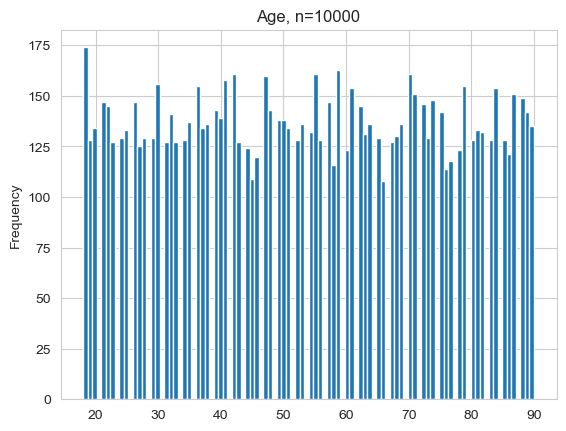

                              count       mean       std   min    25%     50%  \
Intraocular Pressure (IOP)  10000.0  17.507527  4.356101  10.0  13.76  17.485   

                             75%   max  
Intraocular Pressure (IOP)  21.3  25.0  


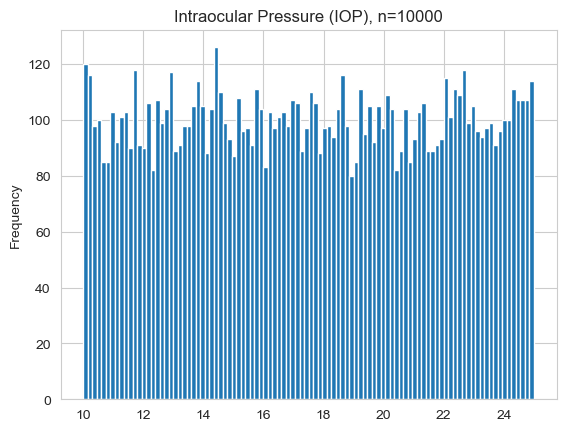

                           count      mean       std  min   25%   50%   75%  \
Cup-to-Disc Ratio (CDR)  10000.0  0.548437  0.144326  0.3  0.42  0.55  0.67   

                         max  
Cup-to-Disc Ratio (CDR)  0.8  


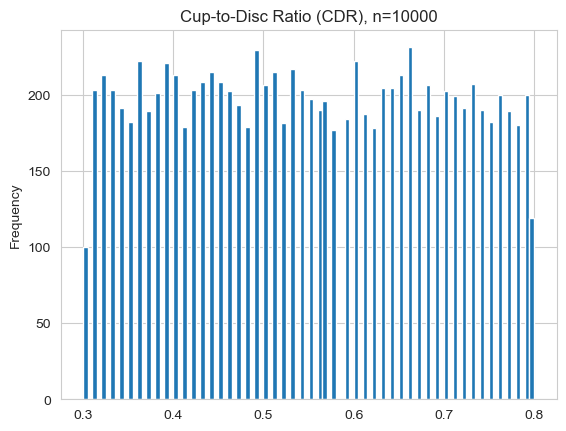

              count        mean        std     min     25%      50%       75%  \
Pachymetry  10000.0  549.733974  28.902741  500.01  524.59  549.335  574.9725   

               max  
Pachymetry  599.99  


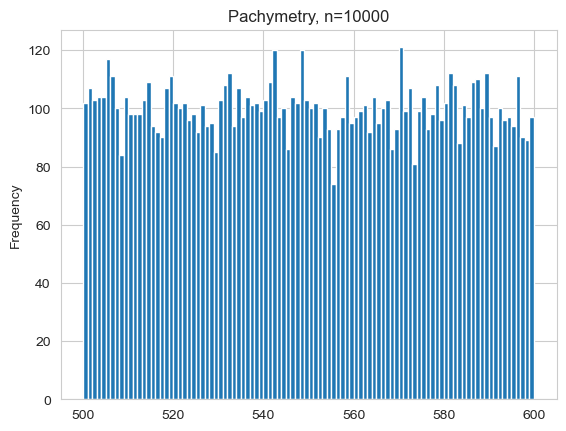

                    count      mean       std  min   25%   50%   75%  max
VFTR Sensitivity  10000.0  0.750052  0.143988  0.5  0.63  0.75  0.87  1.0


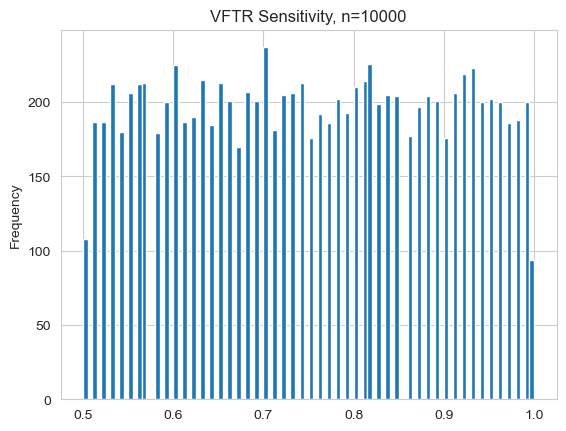

                    count      mean       std  min   25%   50%   75%  max
VFTR Specificity  10000.0  0.850237  0.086709  0.7  0.77  0.85  0.92  1.0


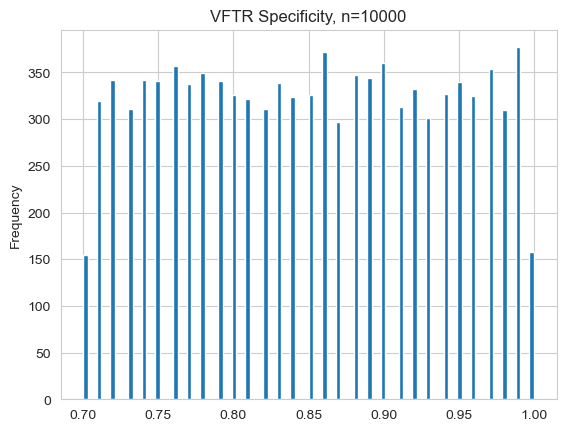

                  count       mean       std    min    25%    50%    75%  \
RNFL Thickness  10000.0  87.433765  7.176537  75.01  81.28  87.38  93.64   

                  max  
RNFL Thickness  100.0  


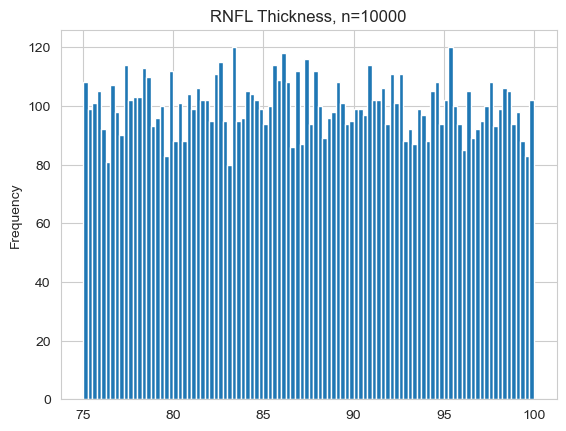

                 count       mean       std   min    25%    50%    75%   max
GCC Thickness  10000.0  62.514676  4.333931  55.0  58.82  62.52  66.24  70.0


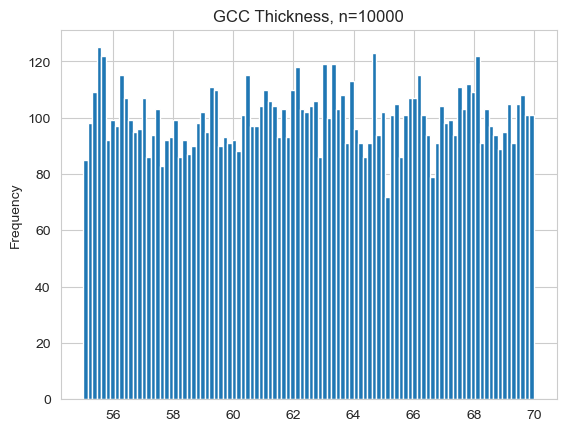

                  count      mean       std  min   25%  50%   75%  max
Retinal Volume  10000.0  6.000813  0.289753  5.5  5.75  6.0  6.25  6.5


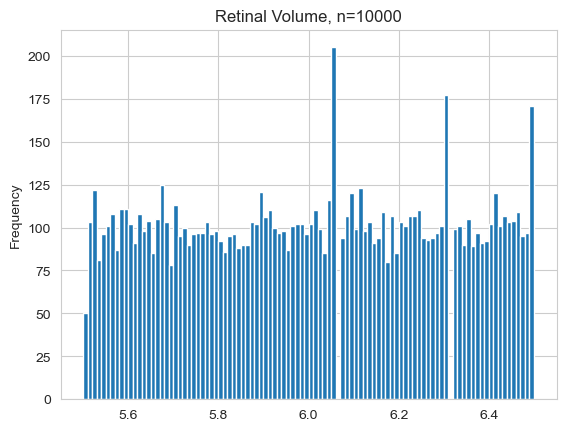

                     count        mean       std    min     25%     50%  \
Macular Thickness  10000.0  275.038068  8.714535  260.0  267.37  275.13   

                      75%    max  
Macular Thickness  282.65  290.0  


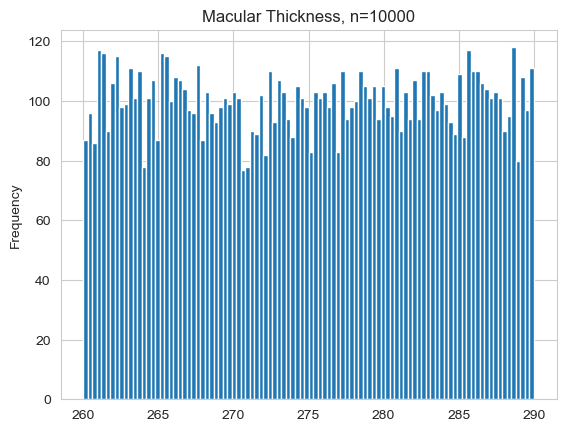

In [172]:
for col in numeric_features.columns:
    plot_numericals(data, [("{}").format(col)])

In [173]:
def plot_categoricals(data, cols, sorted=True):
    summary = data[cols] \
        .describe() \
        .transpose() \
        .sort_values(by='count')

    print(summary)

    for k, (col, val) in enumerate(summary['count'].items()):
        plt.figure()
        ser = data[col].value_counts()
        if sorted:
            ser = ser.sort_values()
        else:
            ser = ser.sort_index()
        ax = ser.plot.barh()
        for container in ax.containers:
            ax.bar_label(container)
        plt.title(f'{col}, n={int(val)}')
        plt.show()

In [174]:
category_features

,Gender,Visual Acuity Measurements,Family History,Cataract Status,Angle Closure Status,No Medication,Omeprazole,Ibuprofen,Lisinopril,Atorvastatin,...,Diabetes,Glaucoma in family,Nausea,Blurred vision,Vomiting,Redness in the eye,Halos around lights,Eye pain,Tunnel vision,Vision loss
0,Male,LogMAR 0.1,No,Present,Open,False,True,True,True,True,...,True,False,True,False,False,False,False,True,True,False
1,Female,LogMAR 0.1,No,Absent,Open,False,True,True,True,True,...,False,False,False,False,False,True,False,False,True,True
2,Female,20/40,No,Absent,Closed,False,False,True,True,True,...,False,False,False,False,False,True,True,False,False,True
3,Male,LogMAR 0.0,No,Absent,Closed,False,False,True,False,False,...,False,False,True,False,False,False,True,False,False,False
4,Male,LogMAR 0.1,No,Absent,Closed,False,True,True,False,True,...,True,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Female,LogMAR 0.1,No,Absent,Open,True,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
9996,Male,LogMAR 0.0,No,Absent,Open,False,False,False,True,False,...,True,False,False,False,True,False,True,True,False,False
9997,Female,20/40,Yes,Present,Open,False,False,True,False,False,...,True,False,False,True,True,False,False,False,False,True
9998,Male,LogMAR 0.1,No,Absent,Closed,True,False,False,False,False,...,False,True,True,False,False,False,True,False,False,False


                            count unique         top  freq
Gender                      10000      2        Male  5029
Eye pain                    10000      2       False  6728
Halos around lights         10000      2       False  6653
Redness in the eye          10000      2       False  6780
Vomiting                    10000      2       False  6667
Blurred vision              10000      2       False  6674
Nausea                      10000      2       False  6688
Glaucoma in family          10000      2       False  7509
Diabetes                    10000      2       False  7529
Hypertension                10000      2       False  7509
No Medical History          10000      2       False  7453
Tunnel vision               10000      2       False  6641
Aspirin                     10000      2        True  5103
Amoxicillin                 10000      2        True  5067
Atorvastatin                10000      2       False  5037
Lisinopril                  10000      2       False  50

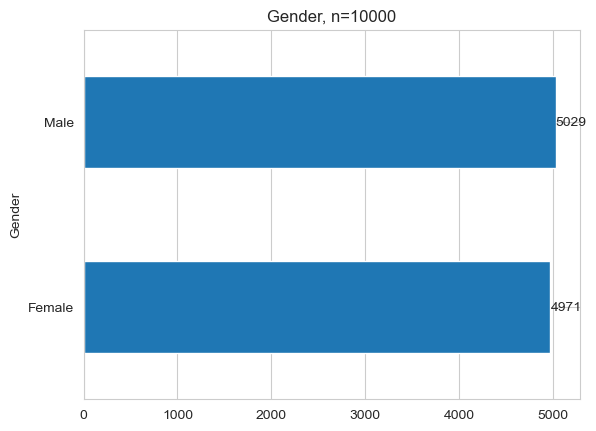

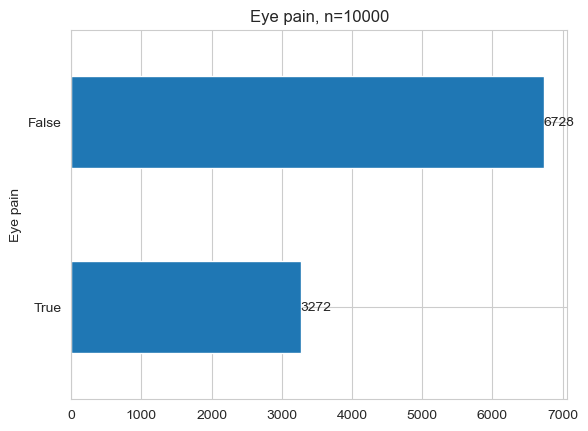

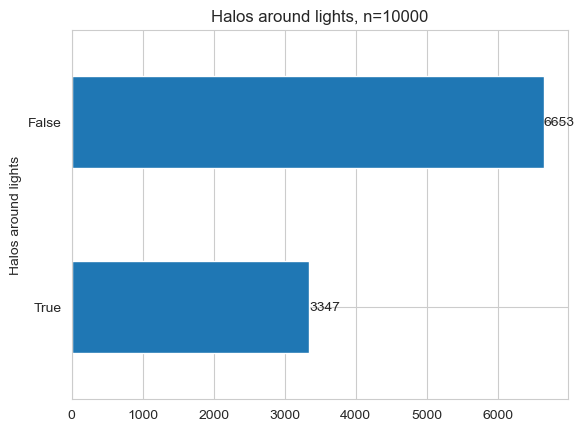

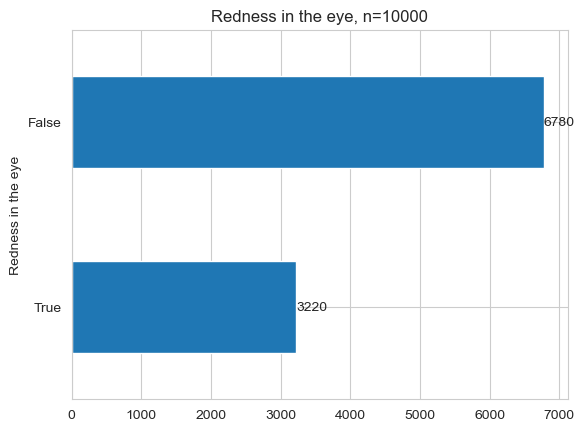

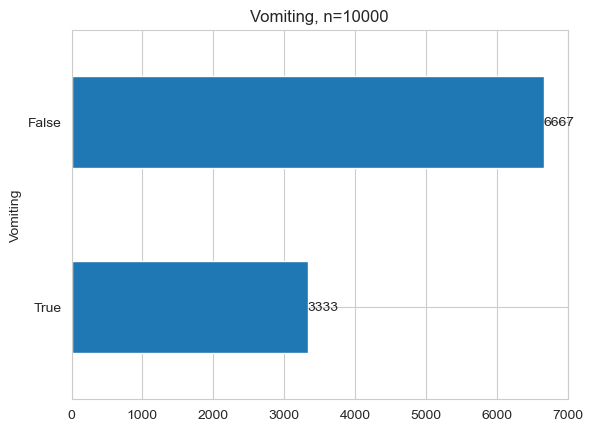

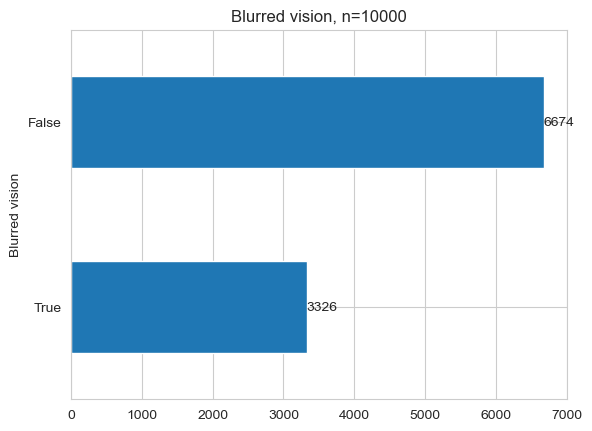

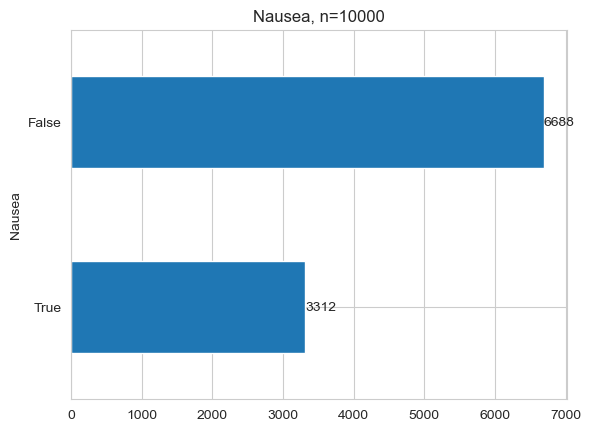

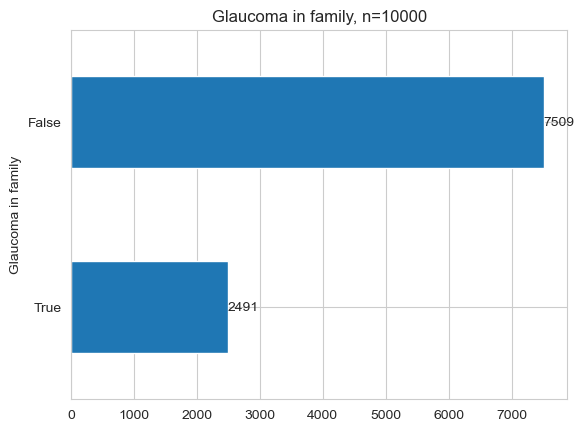

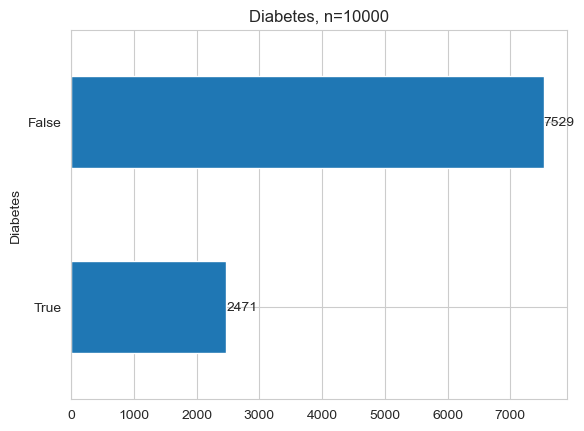

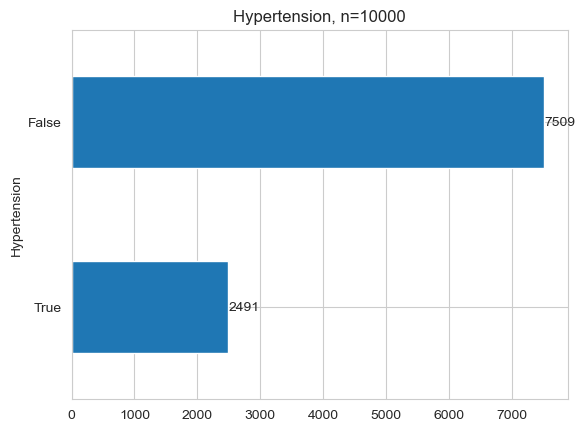

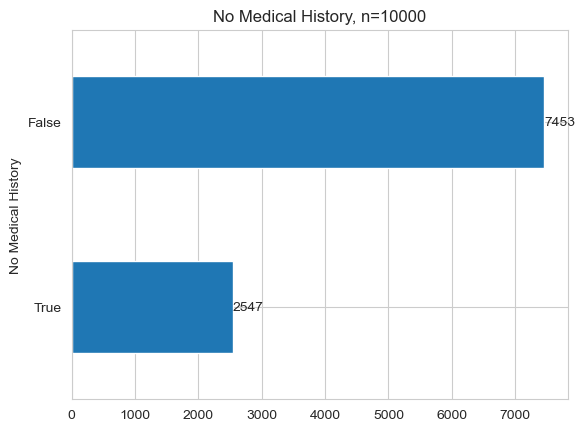

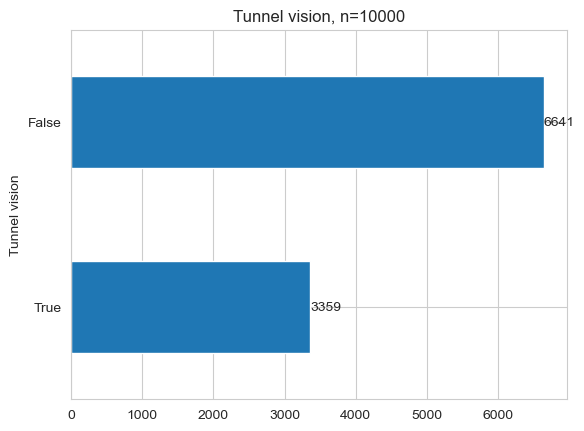

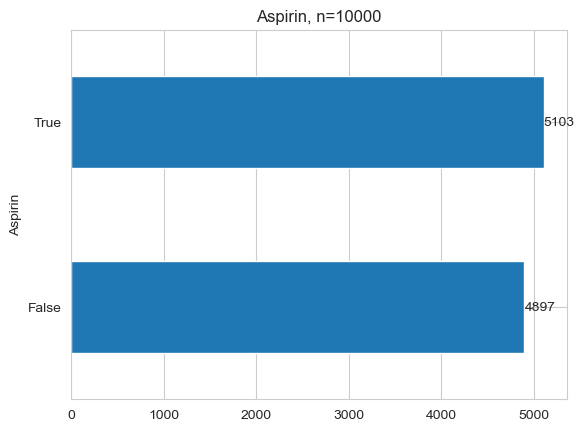

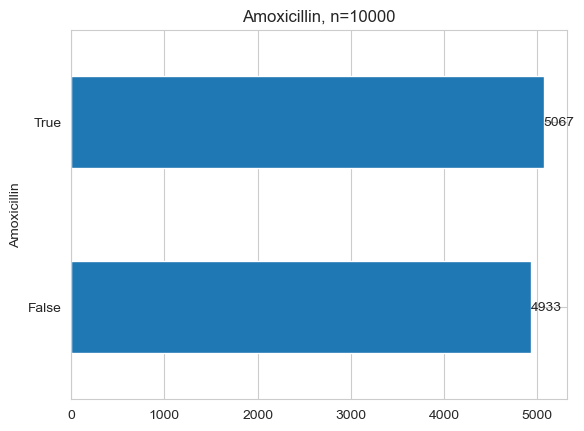

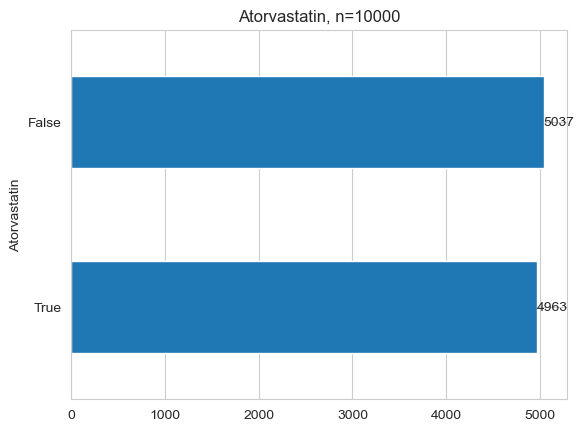

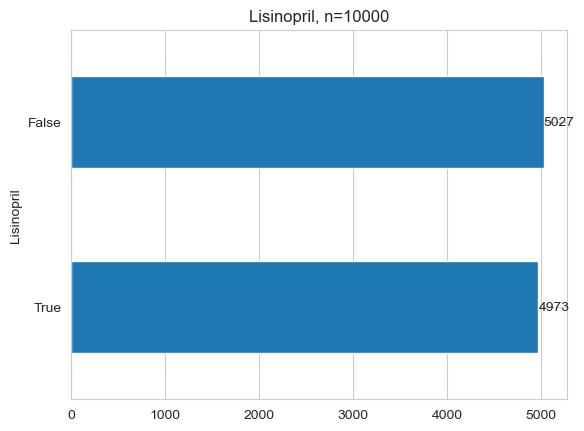

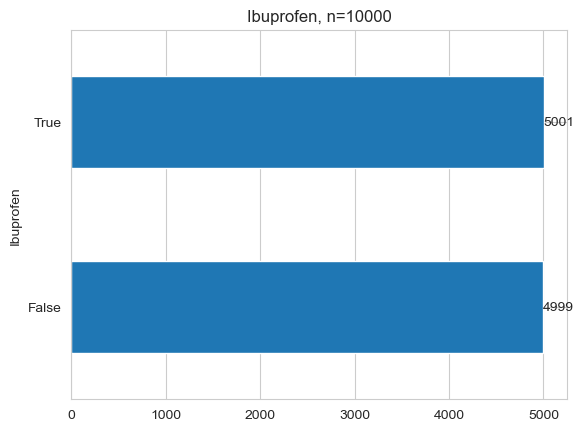

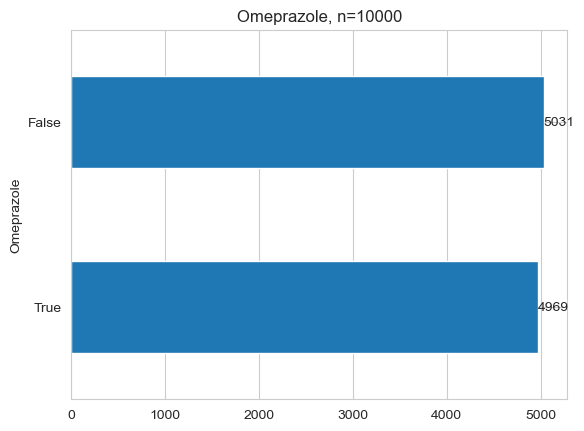

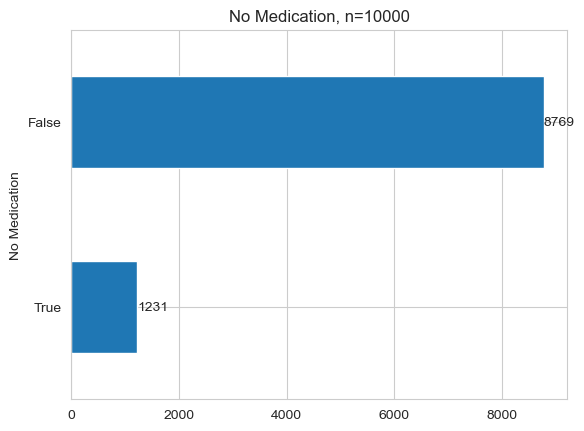

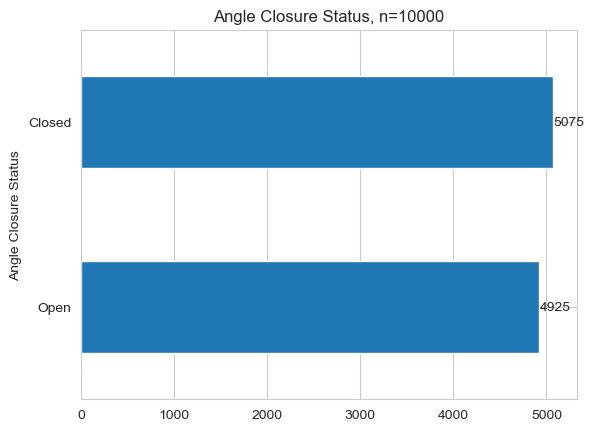

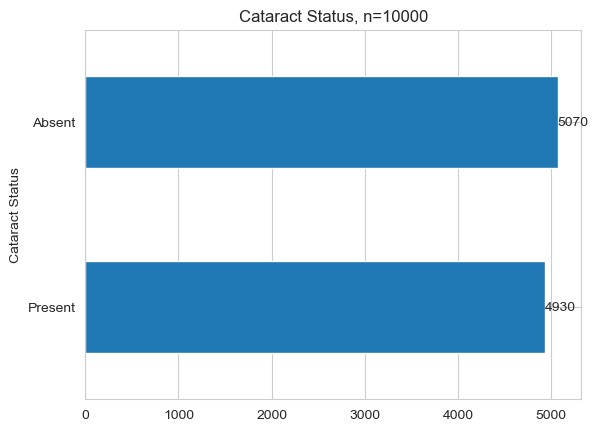

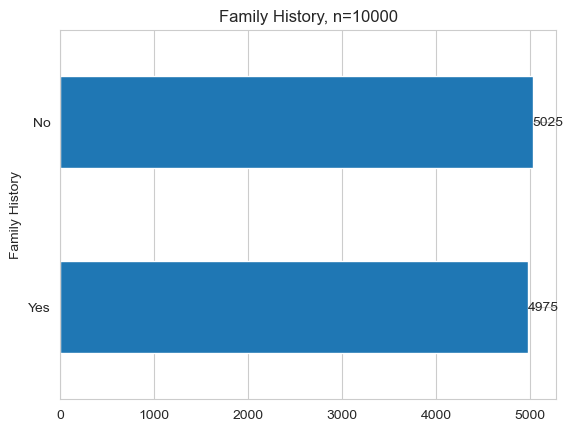

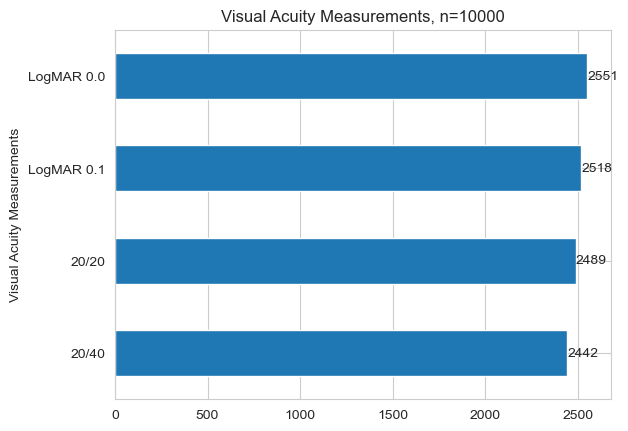

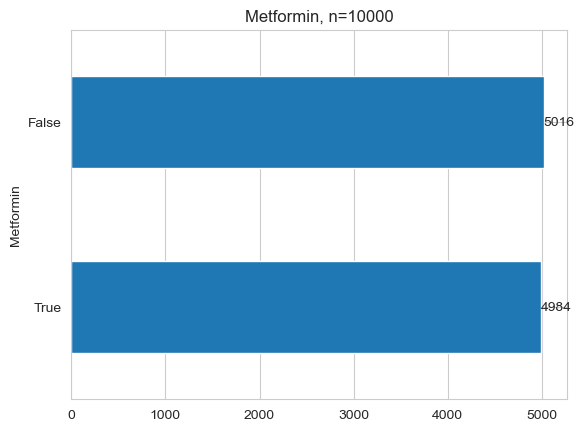

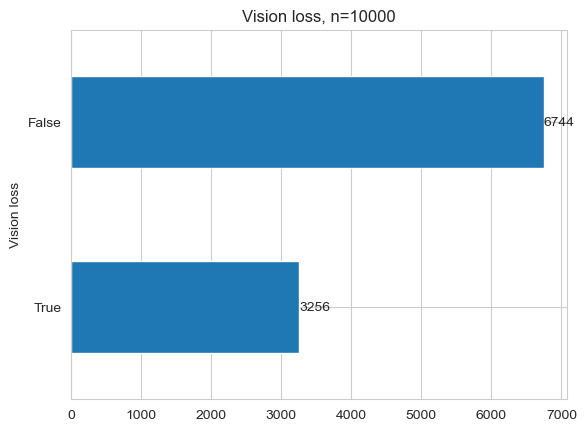

In [175]:
plot_categoricals(data, category_features.columns)

#### Visualizando a distribuição da target feature 'Glaucoma Type'

               count unique                top  freq
Glaucoma Type  10000      6  Juvenile Glaucoma  1734


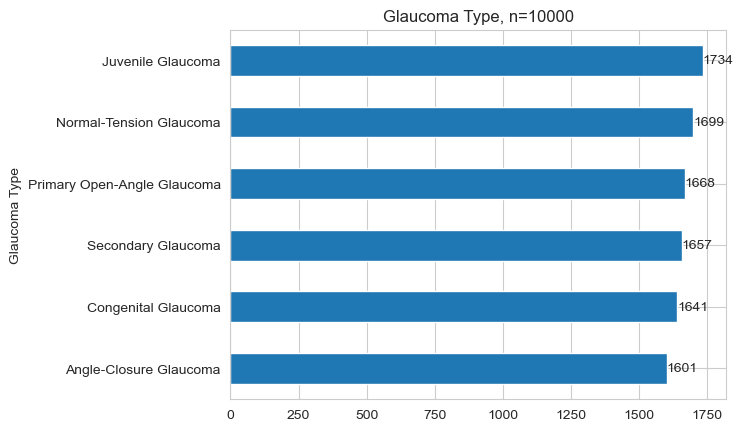

In [176]:
plot_categoricals(data, ['Glaucoma Type'])

Após essa visualização dos dados, é possível afirmar com confiança que todas as variáveis (features) apresentam um estado satisfatório e estão prontas para etapas subsequentes de análise ou modelagem. Observamos que o conjunto de dados é composto por 10.000 observações, sem nenhum valor faltante, o que indica uma coleta de dados completa e robusta.

As variáveis categóricas, como 'Gender', 'Eye pain', 'Halos around lights', entre outras, estão bem distribuídas. Por exemplo, a característica 'Gender' possui uma distribuição quase igual entre os dois gêneros, com 5029 homens e 4971 mulheres. Esta distribuição equilibrada é crucial para evitar viéses em análises futuras.

Além disso, observa-se uma predominância de respostas negativas em variáveis como 'Eye pain', 'Halos around lights', 'Redness in the eye', e outras condições relacionadas, sugerindo um perfil de saúde ocular geralmente bom na amostra analisada. Esta tendência é importante para a compreensão do perfil de saúde do grupo estudado.

Os dados sobre medicação, como 'Atorvastatin', 'Aspirin', 'Metformin', entre outros, também mostram uma distribuição balanceada entre as categorias. Isso é essencial para análises que buscam compreender a relação entre o uso de medicamentos e a saúde ocular.

Em resumo, a qualidade dos dados é alta, com uma distribuição equilibrada das variáveis categóricas e ausência de valores faltantes. Essa integridade dos dados é fundamental para garantir a confiabilidade de quaisquer insights ou modelos preditivos que sejam desenvolvidos a partir deste conjunto de dados.

#### 3.1 Análise da Distribuição das features em relação à variável alvo (Glaucoma Type)

Primeiramente, vamos analisar a distribuição das features númericas em relação à variável alvo (Glaucoma Type) com o auxílio de boxplots.

c:\Users\Marlon\anaconda3\envs\glaucoma\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Marlon\anaconda3\envs\glaucoma\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Marlon\anaconda3\envs\glaucoma\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


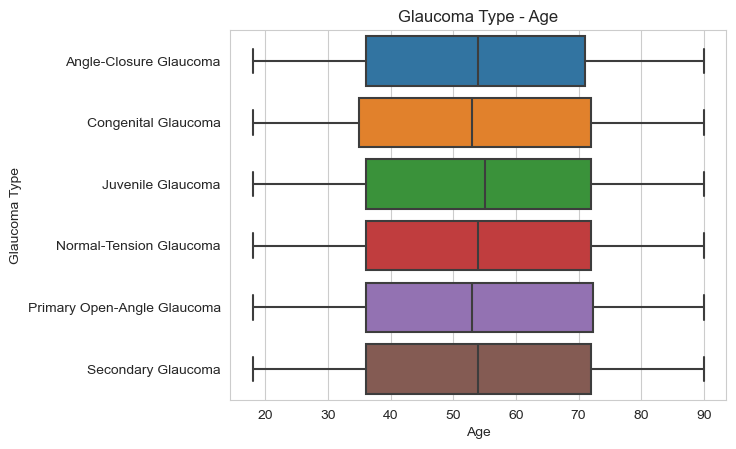

c:\Users\Marlon\anaconda3\envs\glaucoma\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Marlon\anaconda3\envs\glaucoma\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Marlon\anaconda3\envs\glaucoma\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


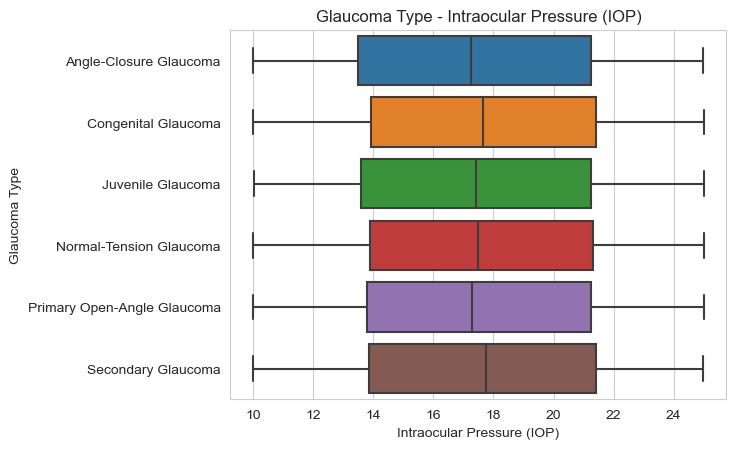

c:\Users\Marlon\anaconda3\envs\glaucoma\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Marlon\anaconda3\envs\glaucoma\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Marlon\anaconda3\envs\glaucoma\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


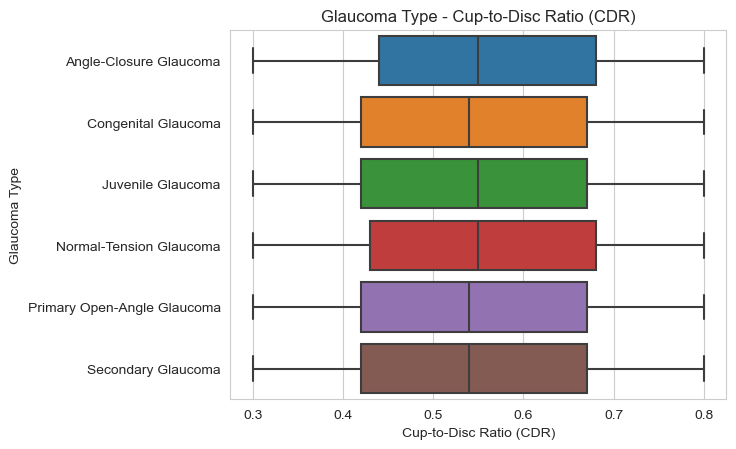

c:\Users\Marlon\anaconda3\envs\glaucoma\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Marlon\anaconda3\envs\glaucoma\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Marlon\anaconda3\envs\glaucoma\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


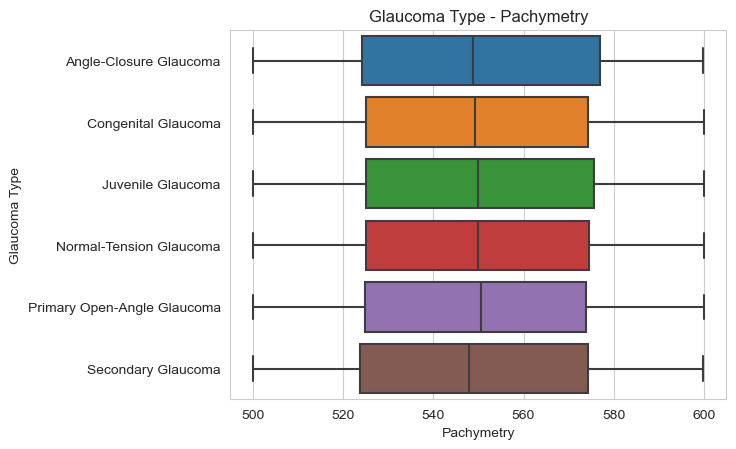

c:\Users\Marlon\anaconda3\envs\glaucoma\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Marlon\anaconda3\envs\glaucoma\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Marlon\anaconda3\envs\glaucoma\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


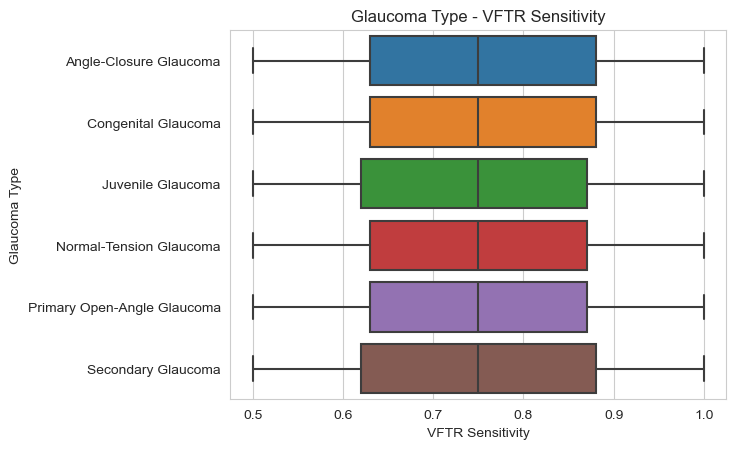

c:\Users\Marlon\anaconda3\envs\glaucoma\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Marlon\anaconda3\envs\glaucoma\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Marlon\anaconda3\envs\glaucoma\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


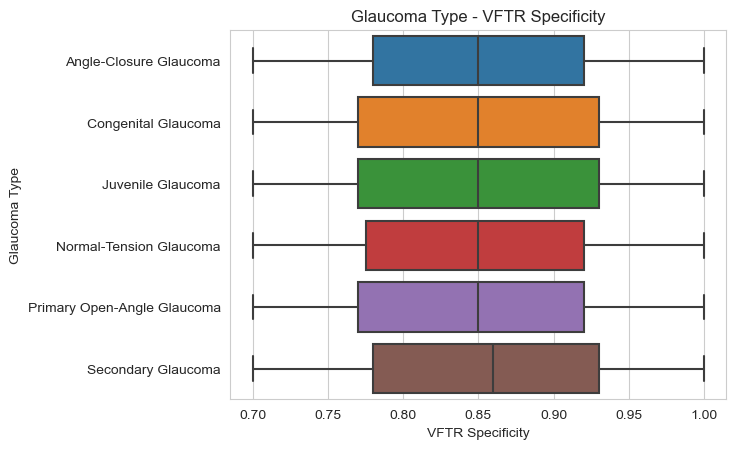

c:\Users\Marlon\anaconda3\envs\glaucoma\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Marlon\anaconda3\envs\glaucoma\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Marlon\anaconda3\envs\glaucoma\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


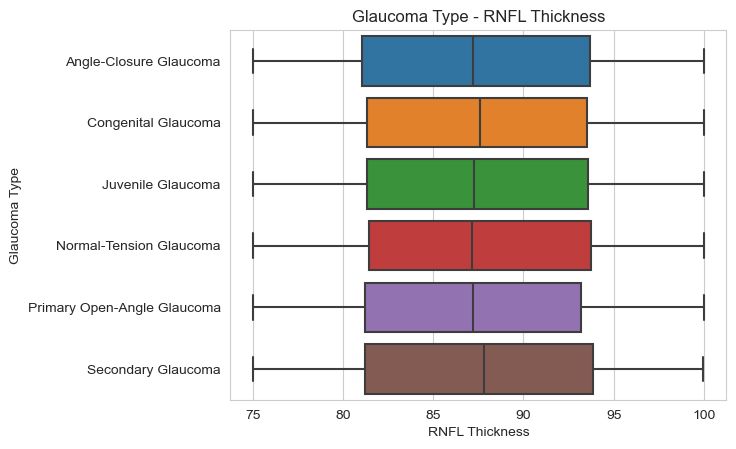

c:\Users\Marlon\anaconda3\envs\glaucoma\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Marlon\anaconda3\envs\glaucoma\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Marlon\anaconda3\envs\glaucoma\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


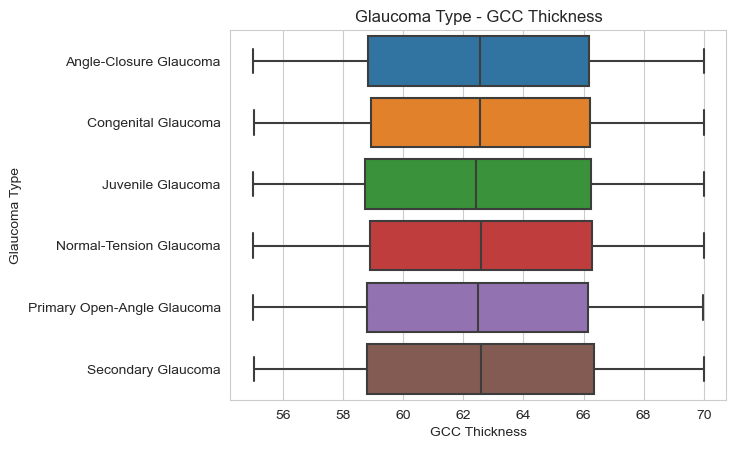

c:\Users\Marlon\anaconda3\envs\glaucoma\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Marlon\anaconda3\envs\glaucoma\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Marlon\anaconda3\envs\glaucoma\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


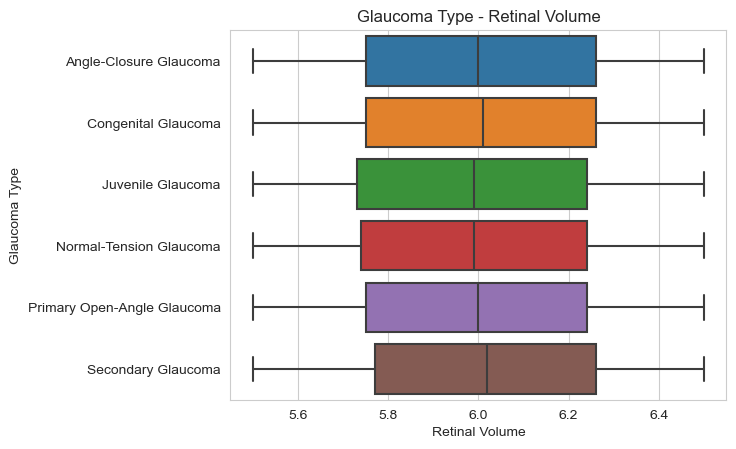

c:\Users\Marlon\anaconda3\envs\glaucoma\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Marlon\anaconda3\envs\glaucoma\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Marlon\anaconda3\envs\glaucoma\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


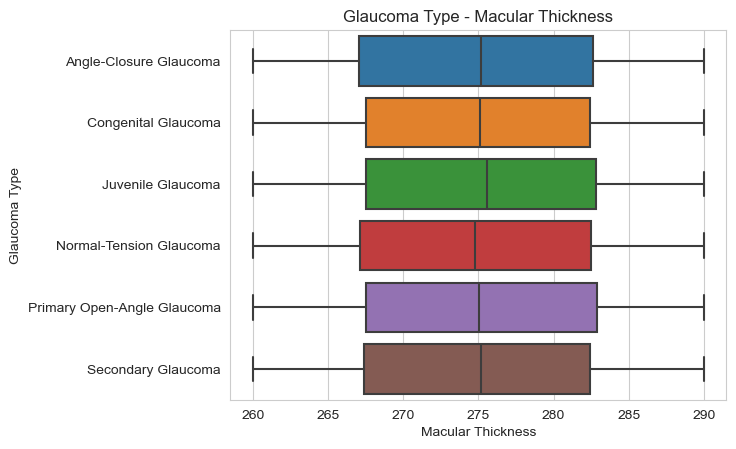

In [177]:
def plot_boxplot(df, cols, col_y='Glaucoma Type'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(x=col, y=col_y, data=df)
        plt.xlabel(col)
        plt.ylabel(col_y)
        plt.title('{} - {}'.format(col_y, col))
        plt.show()

plot_boxplot(data, numeric_features.columns) 


Agora vamos analisar a distribuição das features categóricas em relação à variável alvo (Glaucoma Type) com o auxílio de gráficos de pizza (pie charts).

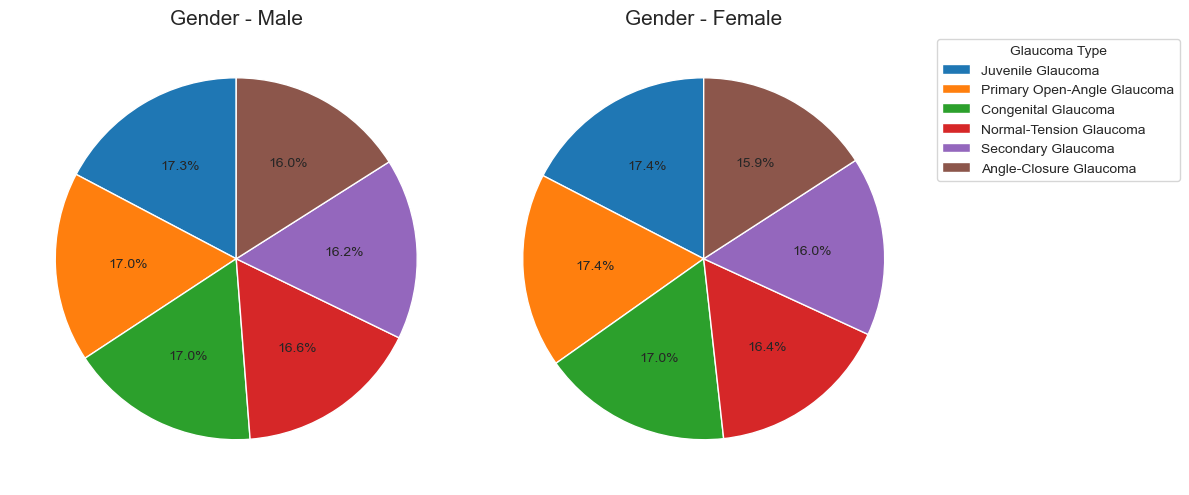

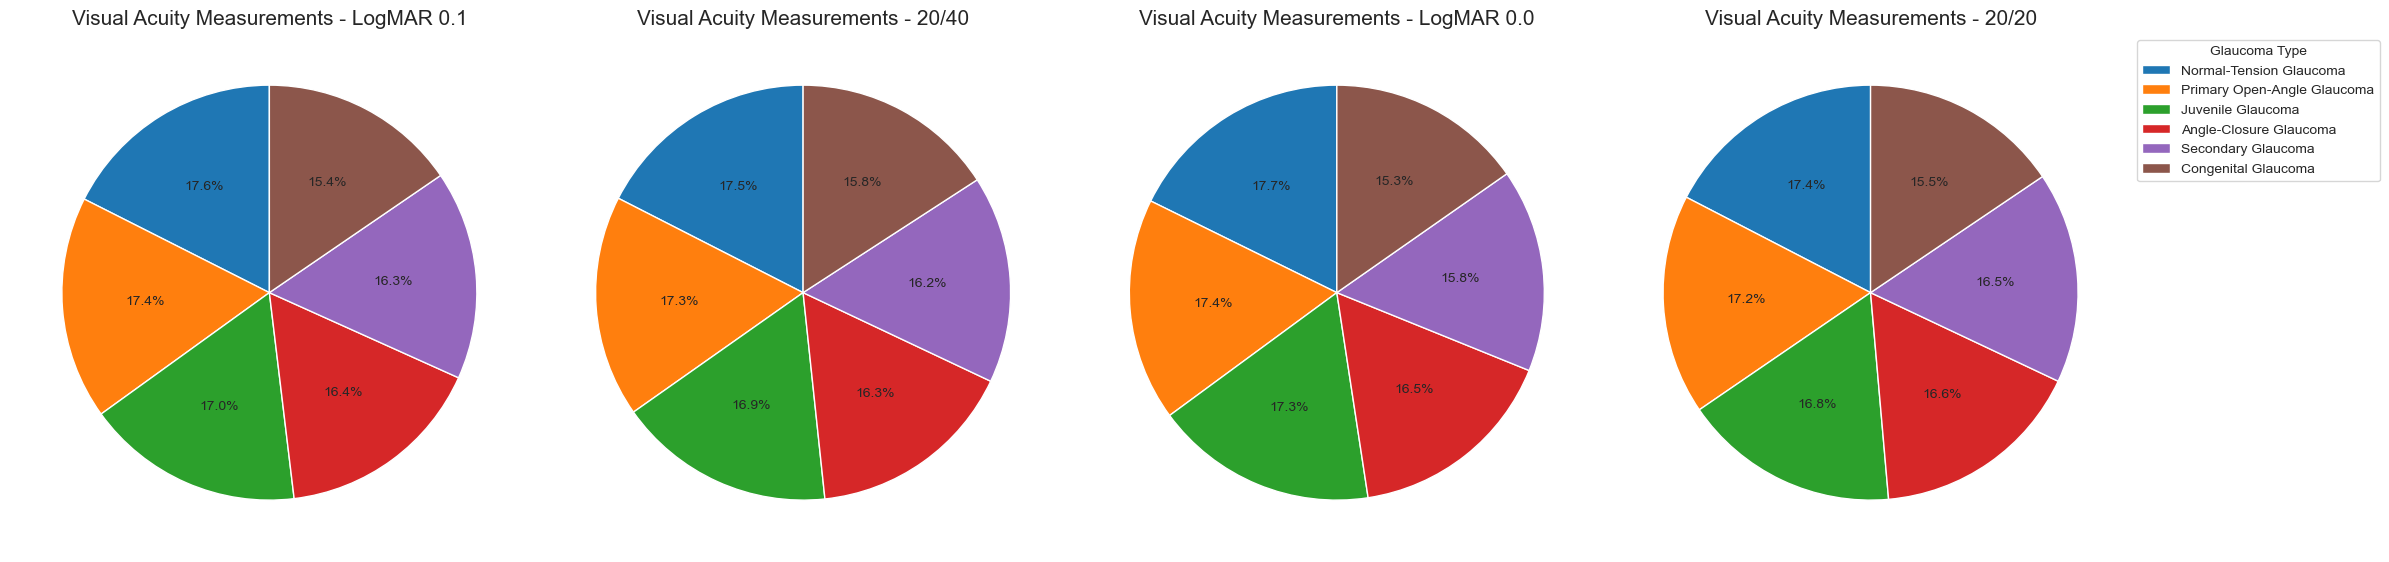

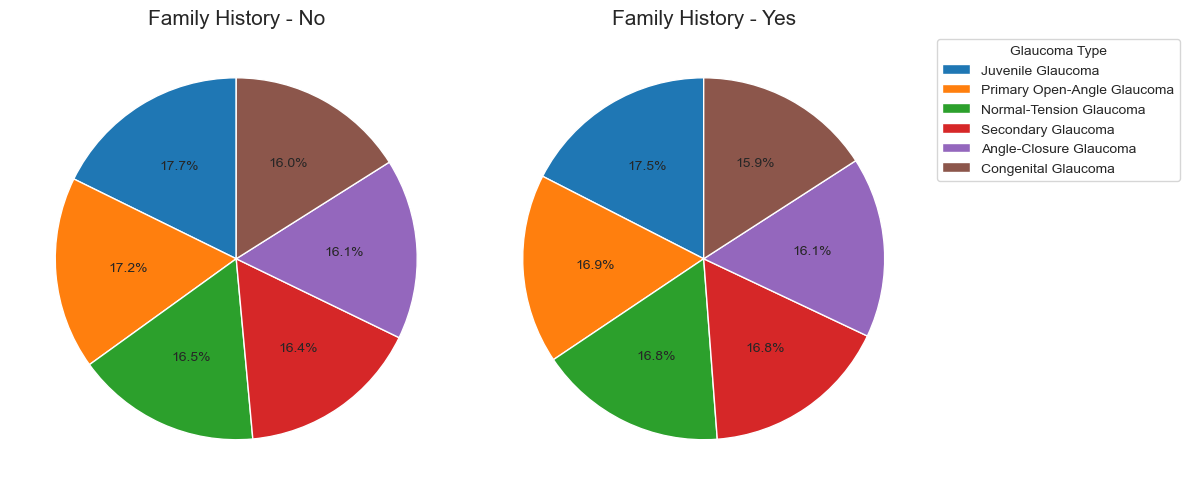

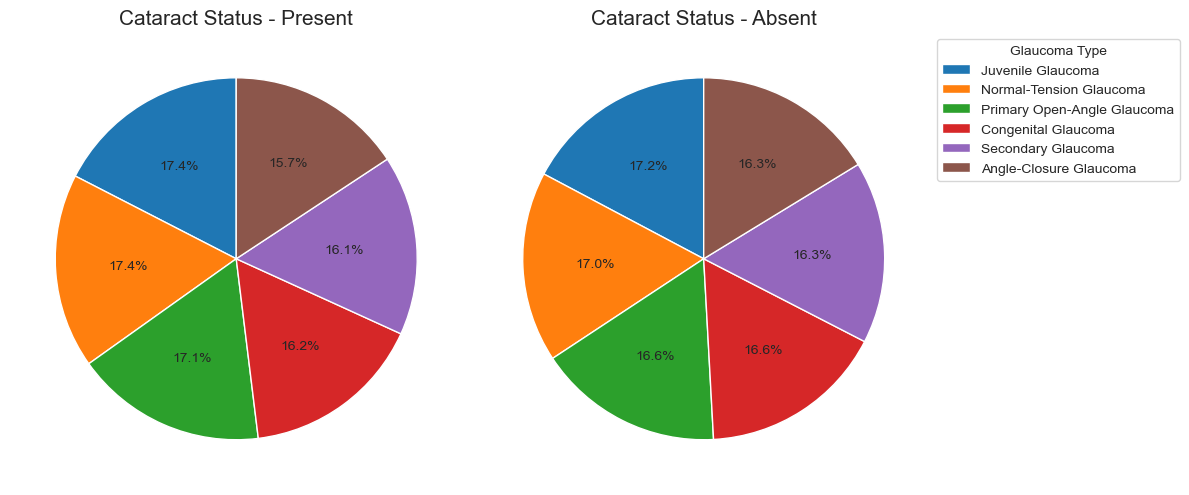

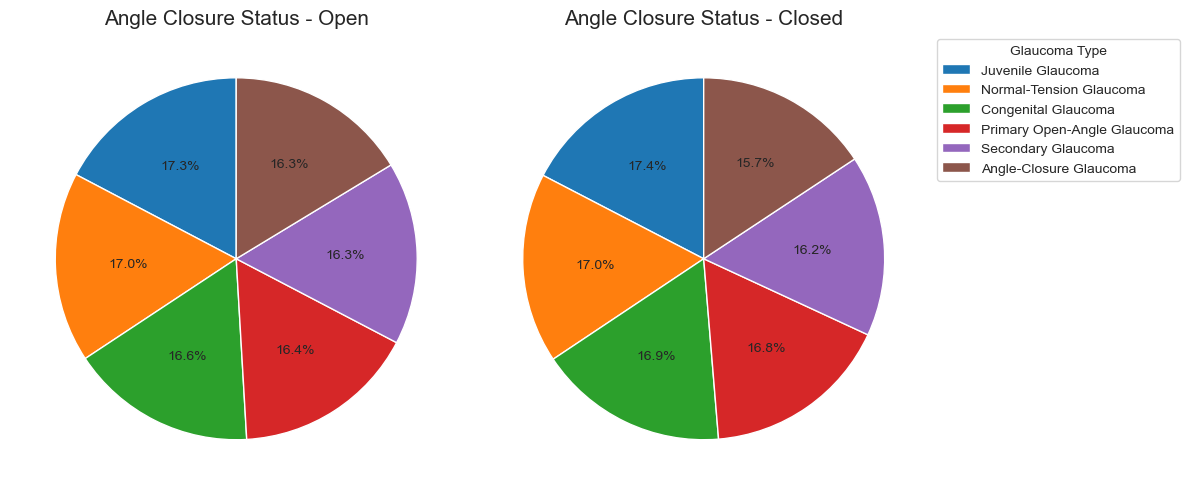

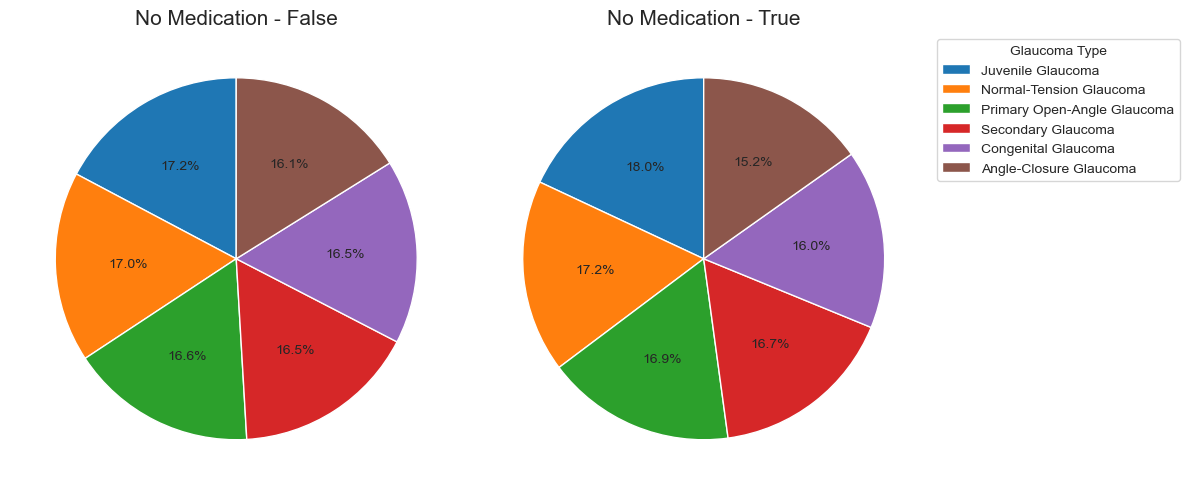

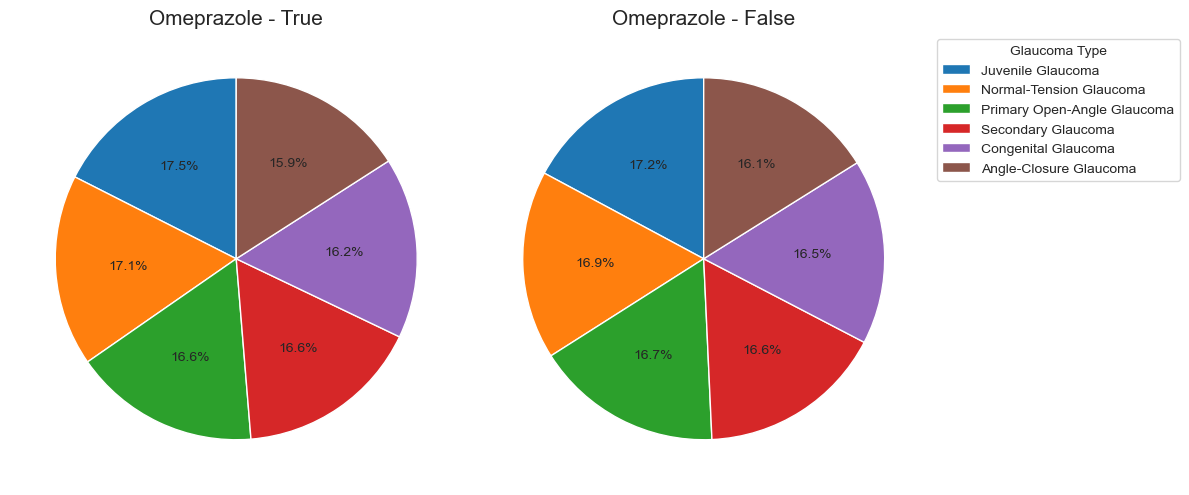

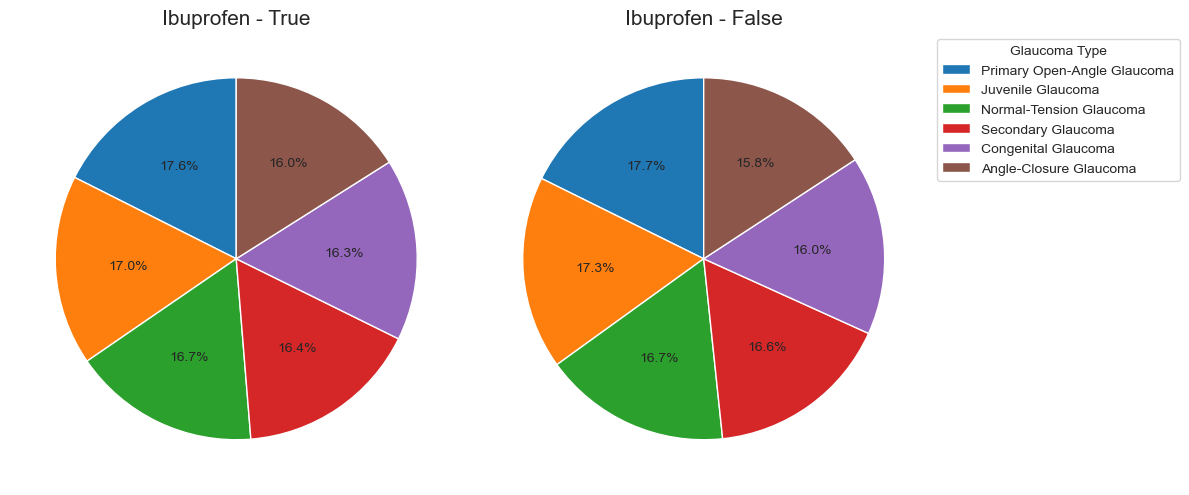

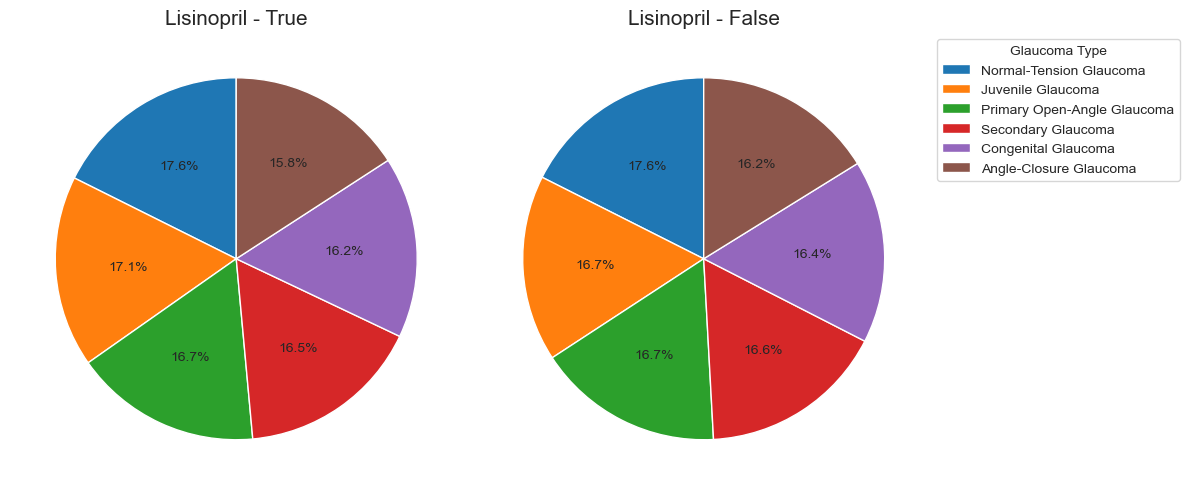

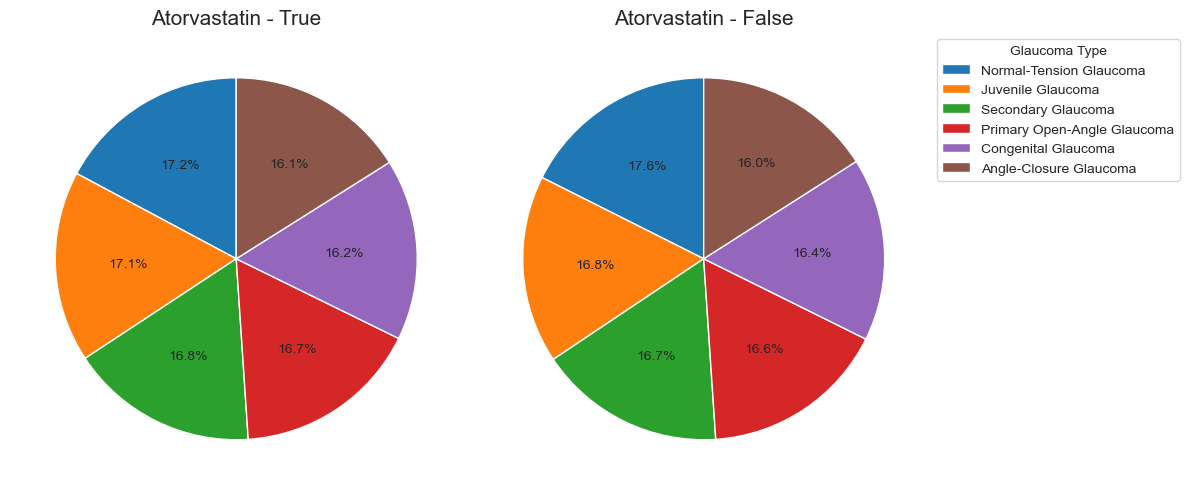

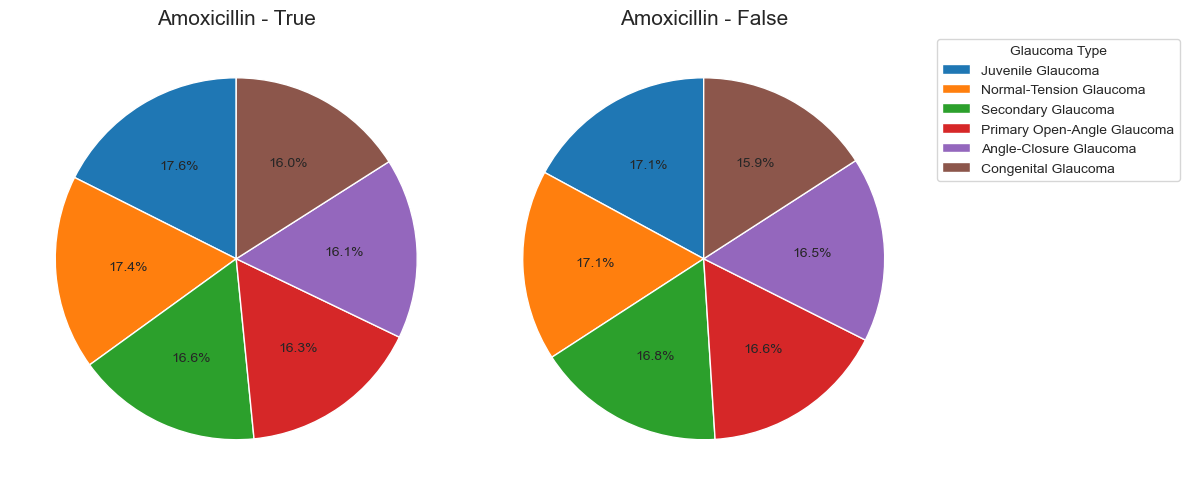

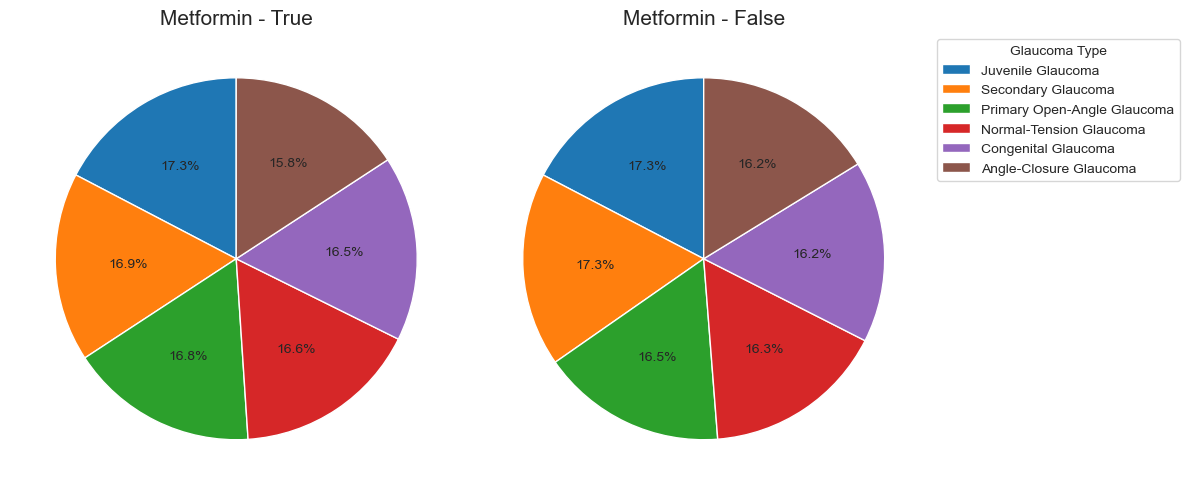

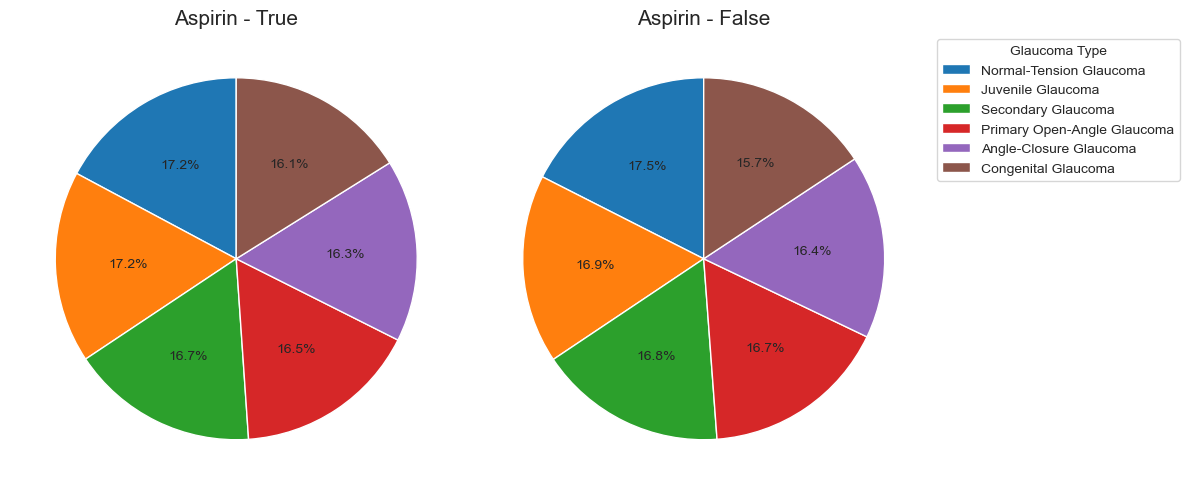

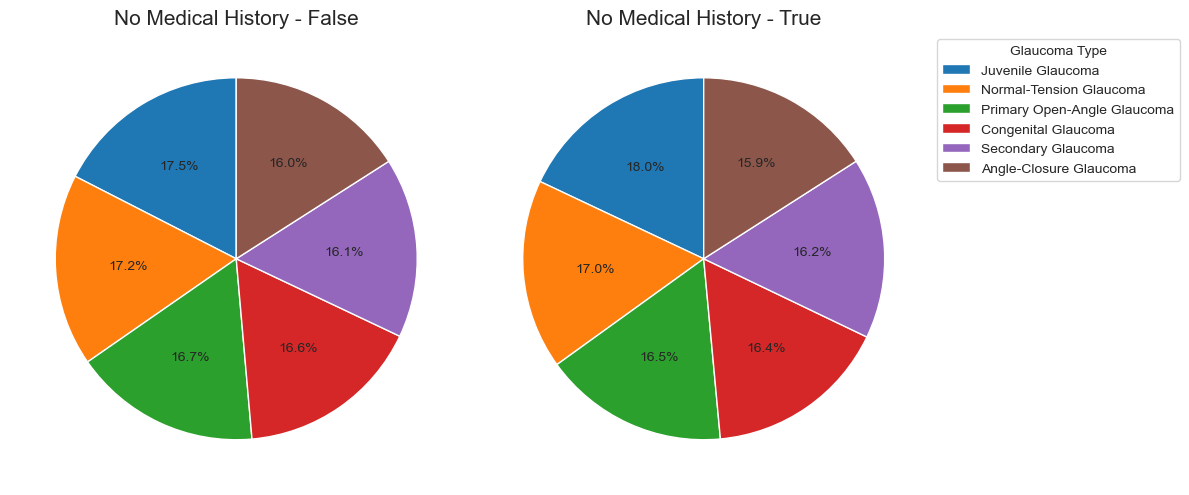

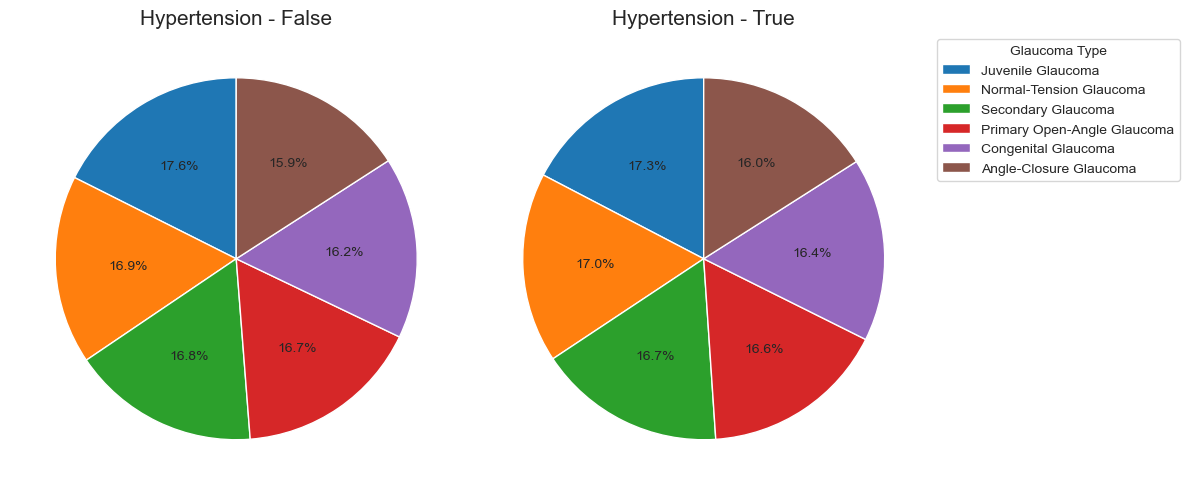

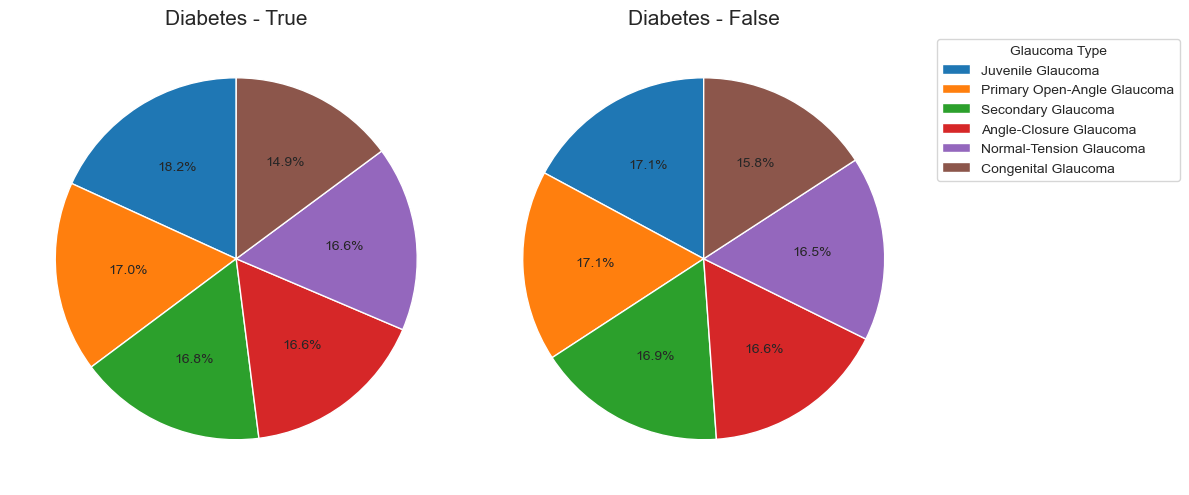

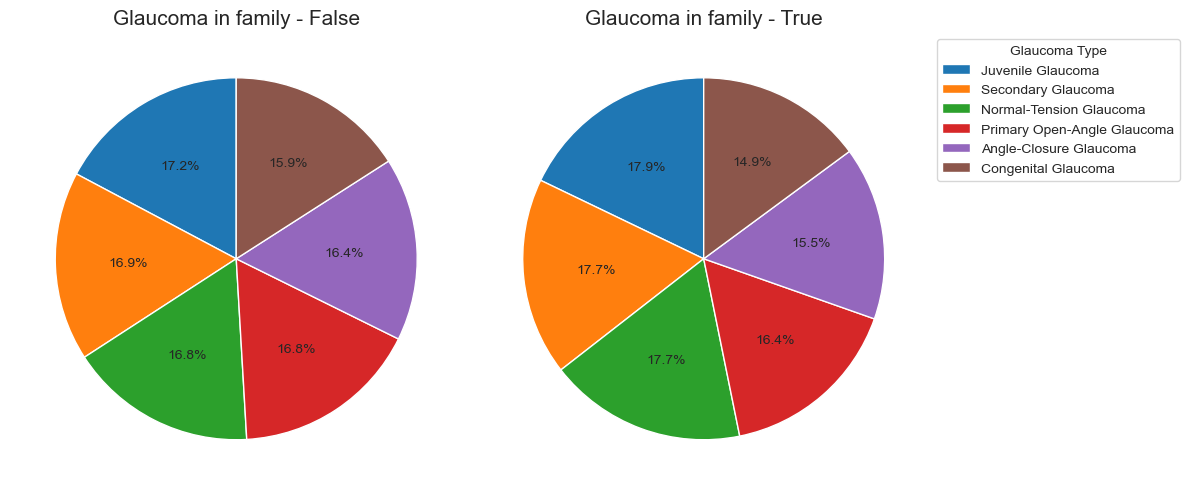

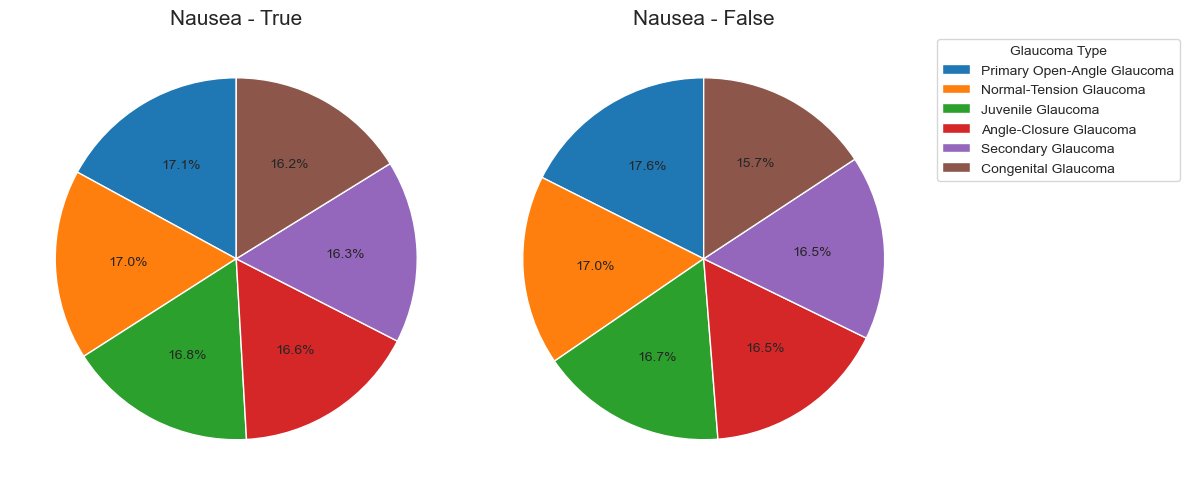

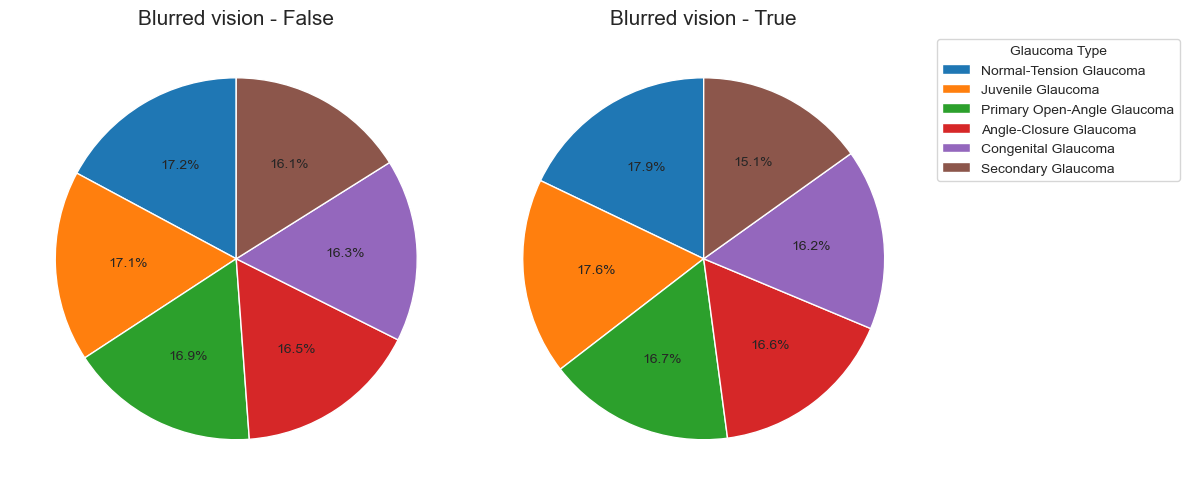

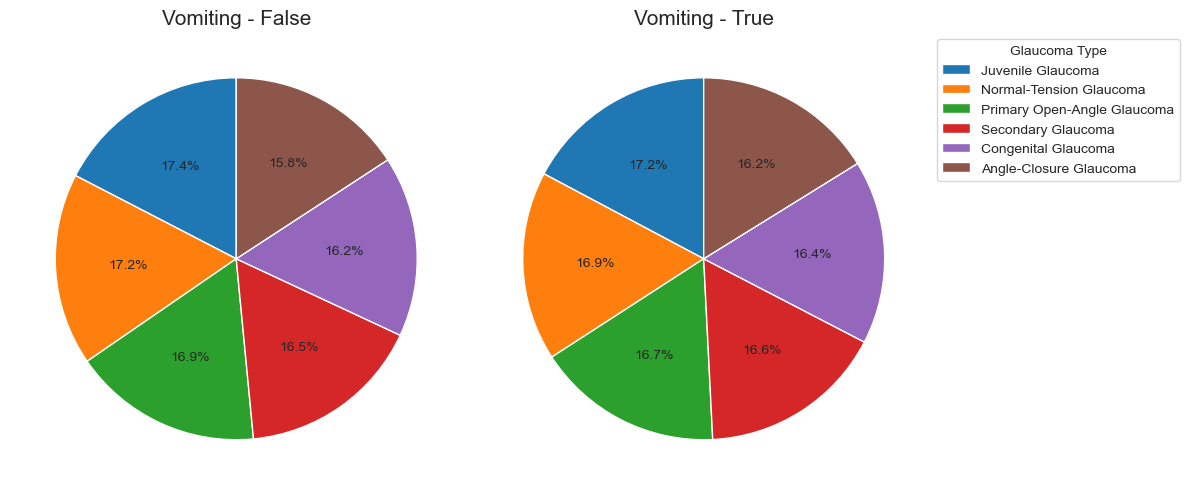

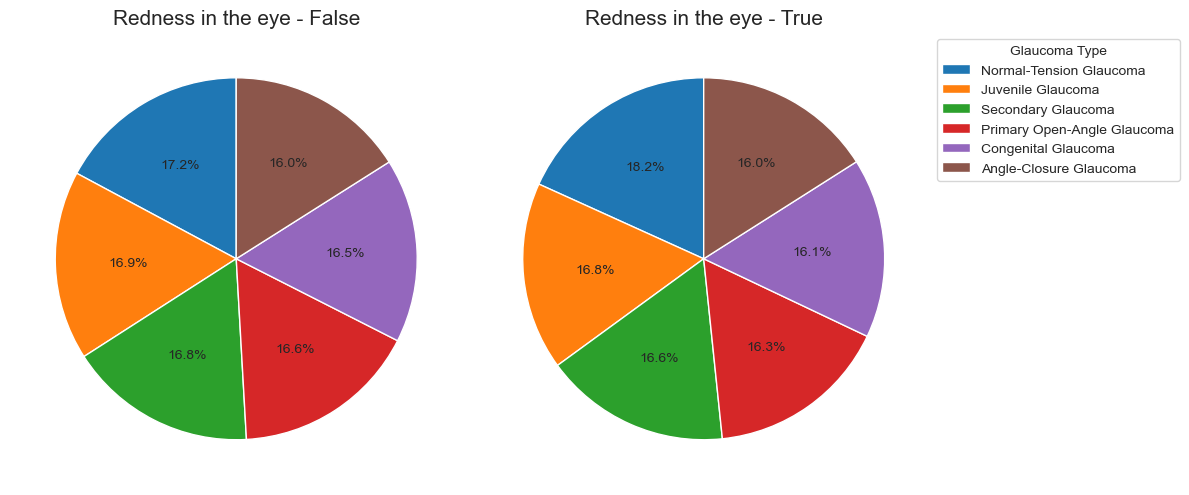

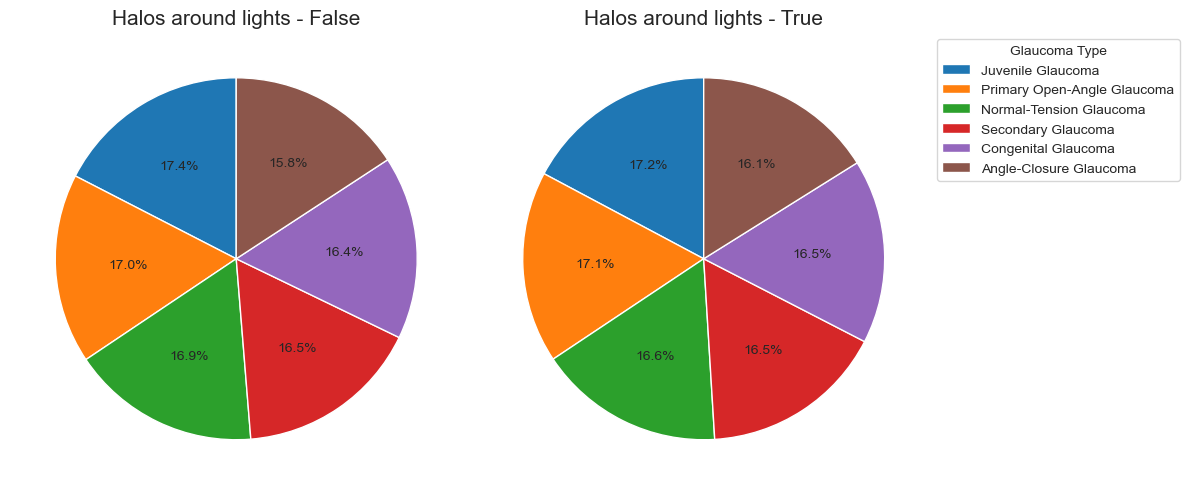

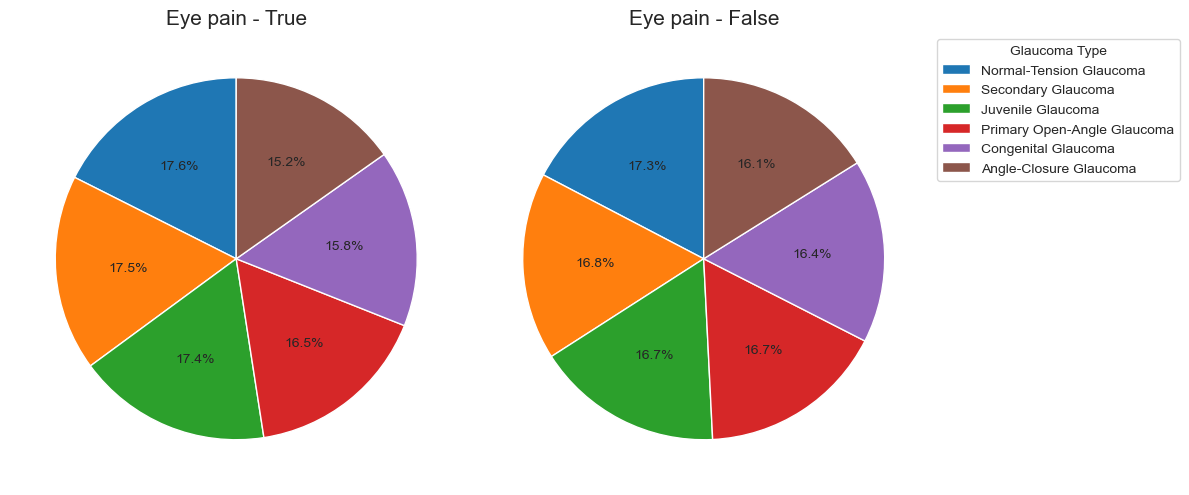

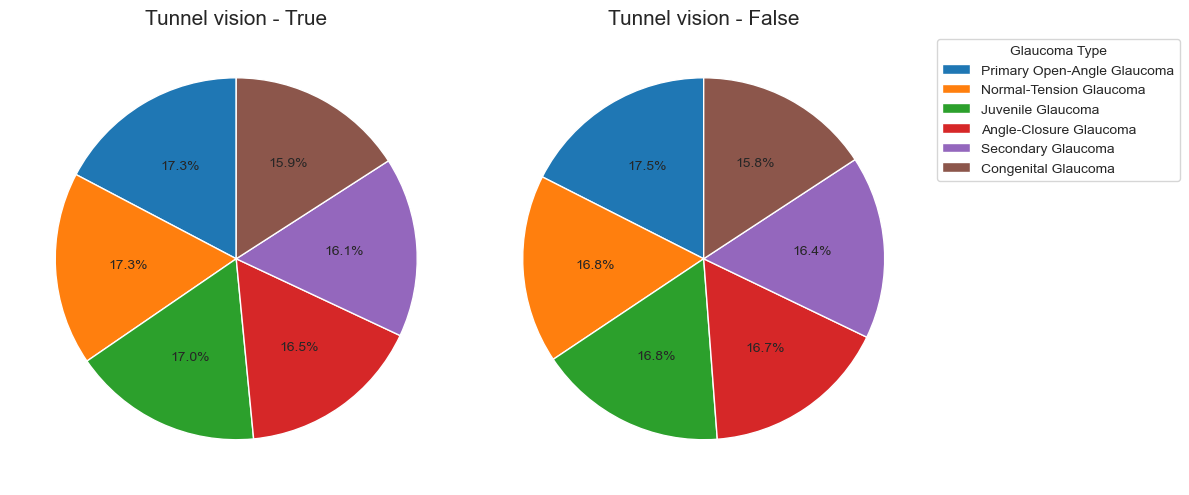

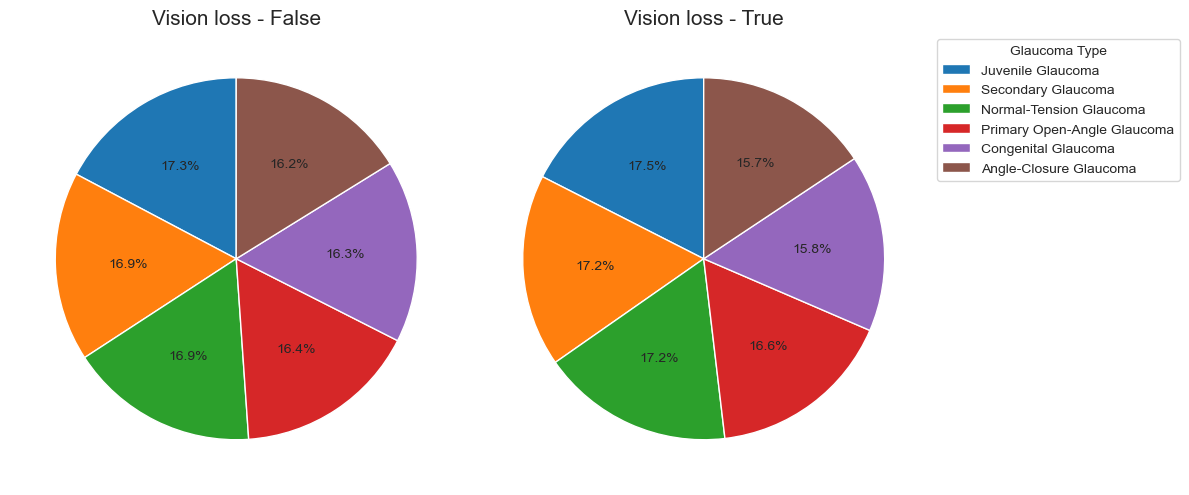

In [178]:

def plot_pie_charts_for_categories(data, category_features, col_y='Glaucoma Type'):
    for col in category_features.columns:
        classes = data[col].unique()
        num_classes = len(classes)
        
        # Ajusta o tamanho da figura com base no número de classes
        plt.figure(figsize=(6 * num_classes, 6))
        
        legend_labels = []  # Lista para armazenar as labels da legenda
        
        for class_ in classes:
            subset = data[data[col] == class_]
            counts = subset[col_y].value_counts()
            
            plt.subplot(1, num_classes, list(classes).index(class_) + 1)
            plt.pie(counts, labels=None, autopct='%1.1f%%', startangle=90)
            
            plt.title('{} - {}'.format(col, class_), fontsize=15)
            
            # Adiciona as labels ao conjunto da legenda
            legend_labels.extend(counts.index)
        
        # Cria uma legenda única fora dos gráficos de pizza
        plt.legend(legend_labels, title=col_y, loc='upper left', bbox_to_anchor=(1, 1))
        
        plt.tight_layout()  # Organiza os gráficos na figura
        plt.show()

plot_pie_charts_for_categories(data, category_features)


**Conclusão da Análise da Distribuição das Features em Relação à Variável Alvo (Glaucoma Type)**

Durante nossa análise  da distribuição das features em relação à variável alvo "Glaucoma Type", exploramos tanto variáveis numéricas quanto categóricas em busca de pistas que pudessem nos fornecer insights valiosos para a classificação de casos de glaucoma. No entanto, nossas descobertas revelam que todas as variáveis, independentemente de serem numéricas ou categóricas, apresentam uma distribuição quase idêntica em relação à variável alvo.

Essa uniformidade nas distribuições sugere que, até o momento, não dispomos de evidências claras que indiquem qual feature específica poderia ser mais útil na tarefa de classificação do tipo de glaucoma.

É importante ressaltar que, embora nossa análise não tenha revelado características distintas que se destacam na discriminação dos tipos de glaucoma, isso não implica que não existam relações significativas entre as features e a variável alvo. 

---

#### 3.2 Análise da Correlação entre as Features Numéricas

In [179]:
corr = data.corr(numeric_only=True)
corr

,Age,Intraocular Pressure (IOP),Cup-to-Disc Ratio (CDR),Pachymetry,VFTR Sensitivity,VFTR Specificity,RNFL Thickness,GCC Thickness,Retinal Volume,Macular Thickness
Age,1.000000,-0.005591,-0.001337,0.008395,-0.019904,-0.005124,0.000767,-0.010044,-0.003186,0.006353
Intraocular Pressure (IOP),-0.005591,1.000000,-0.010838,0.013778,0.007352,-0.003751,-0.001425,0.013513,-0.003443,0.007357
Cup-to-Disc Ratio (CDR),-0.001337,-0.010838,1.000000,-0.012722,0.003475,-0.011060,-0.000461,-0.008360,-0.010125,-0.006113
Pachymetry,0.008395,0.013778,-0.012722,1.000000,0.009023,0.005105,0.001526,-0.004499,0.003486,0.008551
VFTR Sensitivity,-0.019904,0.007352,0.003475,0.009023,1.000000,0.027012,-0.006362,0.007271,0.001238,-0.003220
VFTR Specificity,-0.005124,-0.003751,-0.011060,0.005105,0.027012,1.000000,0.006374,0.011364,-0.009212,0.010661
RNFL Thickness,0.000767,-0.001425,-0.000461,0.001526,-0.006362,0.006374,1.000000,0.006109,0.000343,0.005568
GCC Thickness,-0.010044,0.013513,-0.008360,-0.004499,0.007271,0.011364,0.006109,1.000000,0.000797,0.001531
Retinal Volume,-0.003186,-0.003443,-0.010125,0.003486,0.001238,-0.009212,0.000343,0.000797,1.000000,-0.000233
Macular Thickness,0.006353,0.007357,-0.006113,0.008551,-0.003220,0.010661,0.005568,0.001531,-0.000233,1.000000


<Axes: >

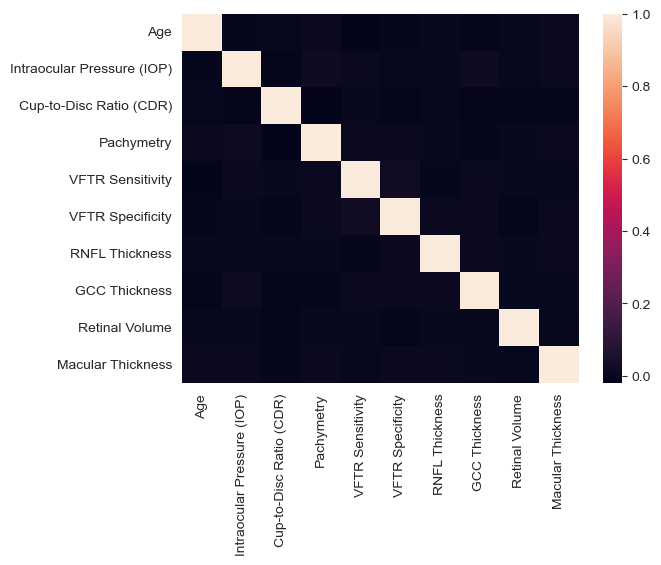

In [180]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

Como podemos ver, nossos resultados revelam que, entre todas as combinações de features numéricas avaliadas, nenhum par demonstrou uma correlação significativa.

Essa ausência de correlações marcantes entre as features numéricas sugere que não existem relações lineares fortes entre essas variáveis dentro do conjunto de dados

---

### 4. Preparação dos Dados para Modelagem

Primeiramente, vamos separar o dataset em features e target e depois separar os dados em treino e teste.

In [181]:
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

X = data.drop('Glaucoma Type', axis=1)
y = data['Glaucoma Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

print(X_train.shape)
print(X_test.shape)

(8000, 35)
(2000, 35)


Agora, vamos aplicar o encoder na variável alvo (target) para transformar os valores categóricos em valores numéricos.

In [182]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

c:\Users\Marlon\anaconda3\envs\glaucoma\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Marlon\anaconda3\envs\glaucoma\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\Marlon\anaconda3\envs\glaucoma\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Marlon\anaconda3\envs\glaucoma\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` i

Realizamos então o um pré-processamento essencial dos dados para prepará-los para modelagem. As características numéricas foram padronizadas usando `StandardScaler` e também passaram por uma transformação polinomial de grau 2, o que pode ser útil para capturar relações não lineares. Já as características categóricas foram tratadas com codificação "one-hot" usando `OneHotEncoder`, permitindo que os modelos entendam essas variáveis categóricas. A utilização do `ColumnTransformer` ajudou a aplicar essas transformações de maneira organizada e eficiente às diferentes características. Esse processo é fundamental para garantir que os dados estejam em um formato adequado para treinar modelos de machine learning, facilitando a captura de relações complexas e padrões nos dados.

In [183]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.compose import ColumnTransformer

numeric_features = X_train.select_dtypes(include=[np.number]).columns
categorical_features = X_train.select_dtypes(include=['category']).columns

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False))
])

categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(categories='auto', drop='first', sparse=False, handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

c:\Users\Marlon\anaconda3\envs\glaucoma\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\Marlon\anaconda3\envs\glaucoma\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Marlon\anaconda3\envs\glaucoma\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\Marlon\anaconda3\envs\glaucoma\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future ver

### 5. Modelagem

Com os dados devidamente pré-processados, avançamos para a etapa da modelagem, onde aplicaremos diferentes algoritmos de aprendizado de máquina para criar e treinar nossos modelos. Nesta fase, exploraremos a eficácia de três modelos distintos: `Random Forest`, `XGBoost` e `Support Vector Machines` (SVM).

O modelo `Random Forest` é uma ensemble de árvores de decisão, proporcionando robustez e reduzindo o risco de overfitting. Sua capacidade de lidar com conjuntos de dados complexos o torna uma possível opção para o problema:

In [188]:
#Modelagem usando Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#Determinando os parâmetros do modelo
rf_model = RandomForestClassifier(n_estimators=100, max_depth=2, min_samples_leaf=1, min_samples_split=2, random_state=RANDOM_SEED)
rf_model.fit(X_train_preprocessed, y_train)

y_pred_rf = rf_model.predict(X_test_preprocessed)

#Resultados do modelo
print('Accuracy Score: {}'.format(accuracy_score(y_test, y_pred_rf)))

Accuracy Score: 0.156


O `XGBoost` é uma implementação otimizada de gradient boosting, conhecida por sua eficiência e desempenho superior. Este modelo é particularmente útil para lidar com conjuntos de dados grandes e complexos, proporcionando boa generalização:

In [47]:
#Modelagem usando XGBoost
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators=1000, max_depth=3, learning_rate=0.1, random_state=RANDOM_SEED)
xgb_model.fit(X_train_preprocessed, y_train)

y_pred_xgb = xgb_model.predict(X_test_preprocessed)

print('Accuracy Score: {}'.format(accuracy_score(y_test, y_pred_xgb)))

Accuracy Score: 0.16


`SVM` é um modelo que busca encontrar o hiperplano ótimo para separar classes no espaço de características. Sua capacidade de lidar com dados não lineares e sua eficácia em problemas de classificação o tornam uma escolha sólida:

In [48]:
#Modelagem usando SVM
from sklearn.svm import SVC

svm_model = SVC(C=1.0, kernel='rbf', degree=3, gamma='scale', random_state=RANDOM_SEED)
svm_model.fit(X_train_preprocessed, y_train)

y_pred_svm = svm_model.predict(X_test_preprocessed)

print('Accuracy Score: {}'.format(accuracy_score(y_test, y_pred_svm)))

Accuracy Score: 0.158


Analisando os resultados obtidos, observamos que as pontuações de acurácia para os modelos Random Forest, XGBoost e SVM são relativamente baixas, oscilando em torno de 0.156 a 0.16. Esses valores indicam que, apesar de aplicarmos métodos robustos, a precisão geral dos modelos na tarefa específica não é satisfatória. É crucial agora explorar oportunidades de melhoria por meio do ajuste de hiperparâmetros.

### 6. Ajuste de Hiperparâmetros

Introduzindo a otimização dos hiperparâmetros, utilizaremos o GridSearchCV para buscar as combinações mais eficazes de parâmetros em cada modelo. Essa técnica sistemática nos permitirá explorar diferentes configurações e identificar aquelas que maximizam o desempenho dos modelos. Ao ajustar cuidadosamente os hiperparâmetros, buscamos melhorar não apenas a acurácia, mas também outras métricas de avaliação, garantindo uma abordagem mais refinada e eficiente para lidar com o nosso problema específico.

Para otimizar o desempenho de cada modelo, realizaremos ajustes nos hiperparâmetros específicos de cada algoritmo:

`Random Forest`: exploraremos variações nos parâmetros relacionados ao número de árvores, profundidade máxima e critérios de divisão. 

In [190]:
from sklearn.model_selection import GridSearchCV

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 3, 4]
}

rf_model = RandomForestClassifier(random_state=RANDOM_SEED)

gs_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)

gs_rf.fit(X_train_preprocessed, y_train)

gs_rf.best_params_

Fitting 5 folds for each of 108 candidates, totalling 540 fits


{'max_depth': 2,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [191]:
gs_rf.best_score_

0.177875

`XGBoost`: concentraremos esforços na sintonia fina dos parâmetros relacionados à taxa de aprendizado, número máximo de profundidade da árvore e o número de estimadores.

In [62]:
#Modelagem usando XGBoost com tuning de hiperparâmetros
param_grid_xgb = {
    'n_estimators': [100, 200, 1000],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

xgb_model = XGBClassifier(random_state=RANDOM_SEED)

gs_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, n_jobs=-1, verbose=2)
gs_xgb.fit(X_train_preprocessed, y_train)

gs_xgb.best_params_

Fitting 5 folds for each of 27 candidates, totalling 135 fits


{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200}

In [64]:
gs_xgb.best_score_

0.169375

`SVM`: ajustaremos parâmetros como o coeficiente de regularização, tipo de kernel, grau do polinômio e coeficiente do kernel.

In [192]:
#Modelagem usando SVM com tuning de hiperparâmetros
param_grid_svm = {
    'C': [0.1, 1.0, 10.0],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto']
}

svm_model = SVC(random_state=RANDOM_SEED)

grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid_svm, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train_preprocessed, y_train)

grid_search.best_params_

Fitting 5 folds for each of 72 candidates, totalling 360 fits


{'C': 0.1, 'degree': 2, 'gamma': 'auto', 'kernel': 'poly'}

In [193]:
grid_search.best_score_

0.17824999999999996

### 7. Classificação Binária

In [123]:
#Classificação glaucoma vs não glaucoma
X = data_bin.drop('Diagnosis', axis=1)
y = data_bin['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

print(X_train.shape)
print(X_test.shape)

(8000, 36)
(2000, 36)


In [124]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

c:\Users\Marlon\anaconda3\envs\glaucoma\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Marlon\anaconda3\envs\glaucoma\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\Marlon\anaconda3\envs\glaucoma\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Marlon\anaconda3\envs\glaucoma\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` i

In [125]:
numeric_features = X_train.select_dtypes(include=[np.number]).columns
categorical_features = X_train.select_dtypes(include=['category']).columns

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False))
])

categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(categories='auto', drop='first', sparse=False, handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

c:\Users\Marlon\anaconda3\envs\glaucoma\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\Marlon\anaconda3\envs\glaucoma\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Marlon\anaconda3\envs\glaucoma\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\Marlon\anaconda3\envs\glaucoma\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future ver

In [128]:
#Modelagem usando Random Forest

rf_model = RandomForestClassifier(n_estimators=100, max_depth=2, min_samples_leaf=1, min_samples_split=2, random_state=RANDOM_SEED)
rf_model.fit(X_train_preprocessed, y_train)

y_pred_rf = rf_model.predict(X_test_preprocessed)

print('Accuracy Score: {}'.format(accuracy_score(y_test, y_pred_rf)))

Accuracy Score: 0.5


In [131]:
#random forest com gridsearchcv

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 3, 4]
}

rf_model = RandomForestClassifier(random_state=RANDOM_SEED)

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train_preprocessed, y_train)

grid_search.best_params_

Fitting 5 folds for each of 81 candidates, totalling 405 fits


{'max_depth': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 100}

In [132]:
grid_search.best_score_

0.51125

In [135]:
#XGBoost com gridsearchcv
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [2, 3, 4],
    'learning_rate': [0.01, 0.1, 0.2]
}

xgb_model = XGBClassifier(random_state=RANDOM_SEED)

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train_preprocessed, y_train)

grid_search.best_params_

Fitting 5 folds for each of 27 candidates, totalling 135 fits


{'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 100}

In [136]:
grid_search.best_score_

0.514875